# Les packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import missingno as msno
from math import radians, cos, sin, asin, sqrt

import warnings
warnings.filterwarnings('ignore')
mpl.rcParams["figure.figsize"] = (12, 8)

# Importation des données

In [2]:
#pd.set_option("display.max_rows",df.shape[0]+1)
data_customers = pd.read_csv("olist_customers_dataset.csv")
data_geoloca = pd.read_csv("olist_geolocation_dataset.csv")
data_order = pd.read_csv("olist_order_items_dataset.csv")
data_payement = pd.read_csv("olist_order_payments_dataset.csv")
data_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
data_orders = pd.read_csv("olist_orders_dataset.csv")
data_products = pd.read_csv("olist_products_dataset.csv")
data_sellers = pd.read_csv("olist_sellers_dataset.csv")
data_product_cat = pd.read_csv("product_category_name_translation.csv")

# Description et nettoyage des données

In [3]:
# Afficher les 5 premiers lignes de la liste des clients
data_customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
data_customers.shape

(99441, 5)

<AxesSubplot:>

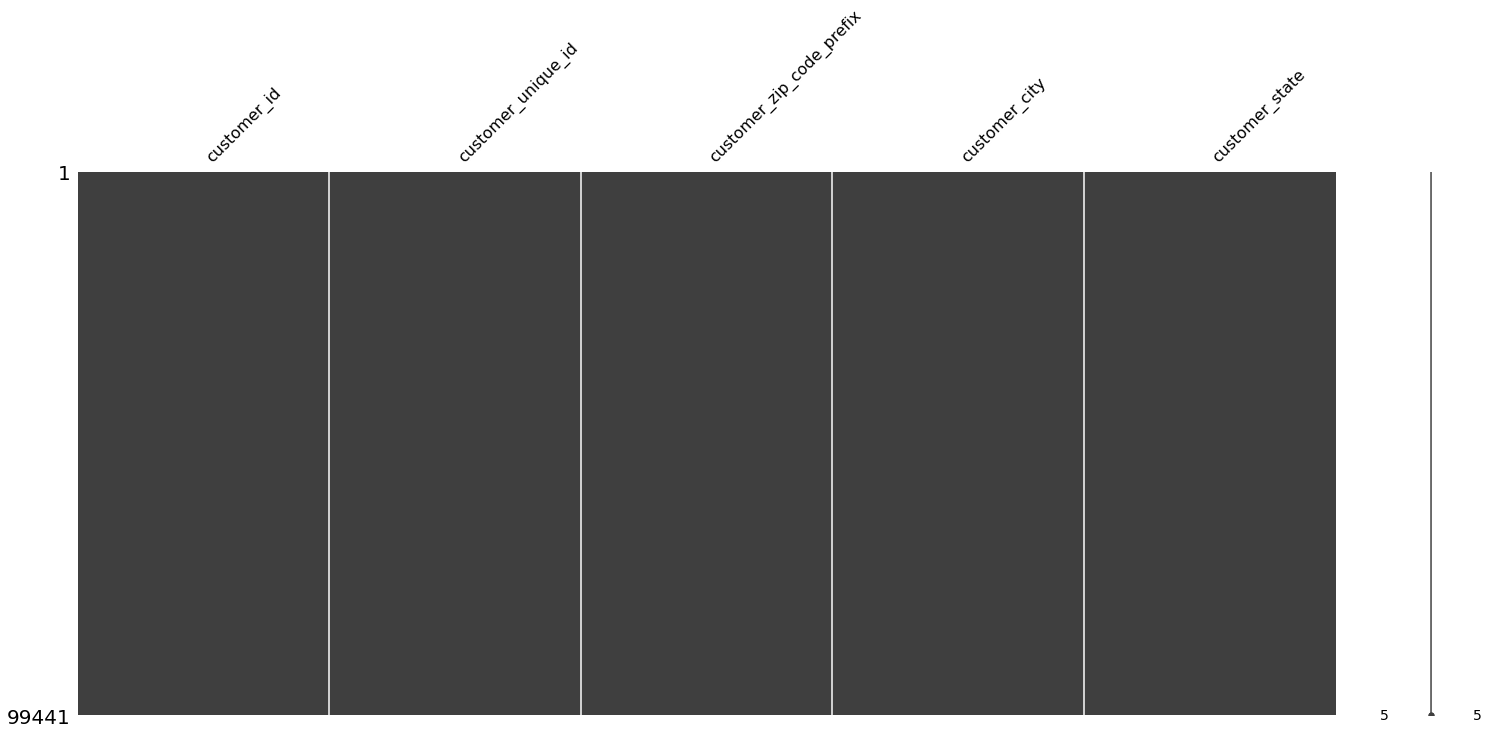

In [5]:
# Visualisation de la nulleté par colonne
msno.matrix(data_customers)

In [6]:
# Structure de l'ensemble des données
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
# Liste des colonnes de data_customers qui ont une seule modalité
[col for col in data_customers.columns.to_list() if len (data_customers[col].unique()) == 1]

[]

On voit avec le premier dataset on a pas de valeurs manquantes, ni une colonne avec une seule modalité

Les variables à retenir sont : customer_id (clé des commandes), customer_unique_id(identifiant unique par client) et 

customer_state(état du client)

In [8]:
# Afficher les 5 premiers lignes de la liste des géolocalisations
data_geoloca.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
data_geoloca.shape

(1000163, 5)

<AxesSubplot:>

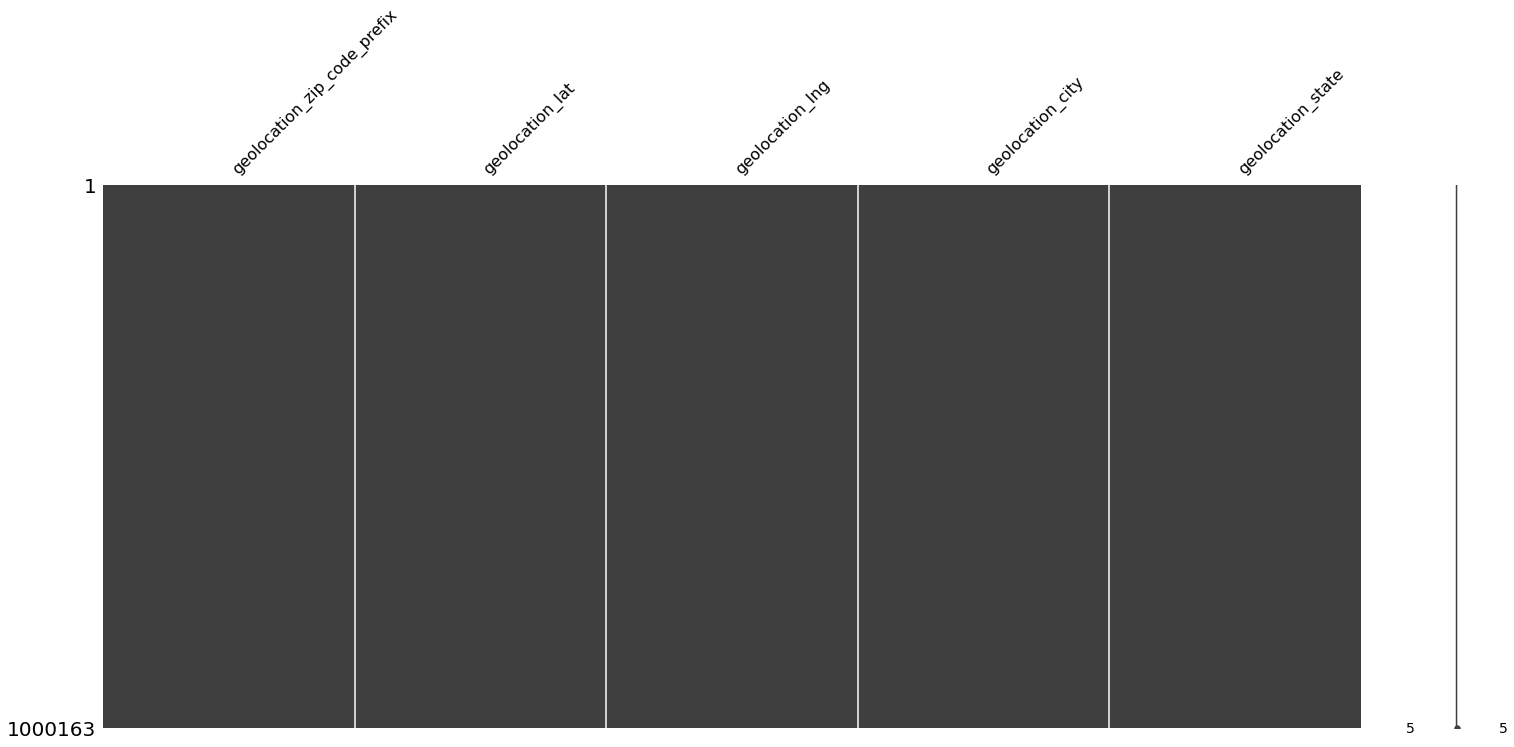

In [10]:
# Visualisation de la nulleté par colonne
msno.matrix(data_geoloca)

In [11]:
# Structure de l'ensemble des données
data_geoloca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [12]:
# Liste des colonnes de data_geoloca qui ont une seule modalité
[col for col in data_geoloca.columns.to_list() if len (data_geoloca[col].unique()) == 1]

[]

Le dataset ne comporte pas de valeurs manquantes, ni de de colonnes avec une seule modalité mais par contre , 

on a plus de 1M de lignes

In [13]:
# Afficher les 5 premiers lignes de la liste d'articles de commandes
data_order.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
data_order.shape

(112650, 7)

<AxesSubplot:>

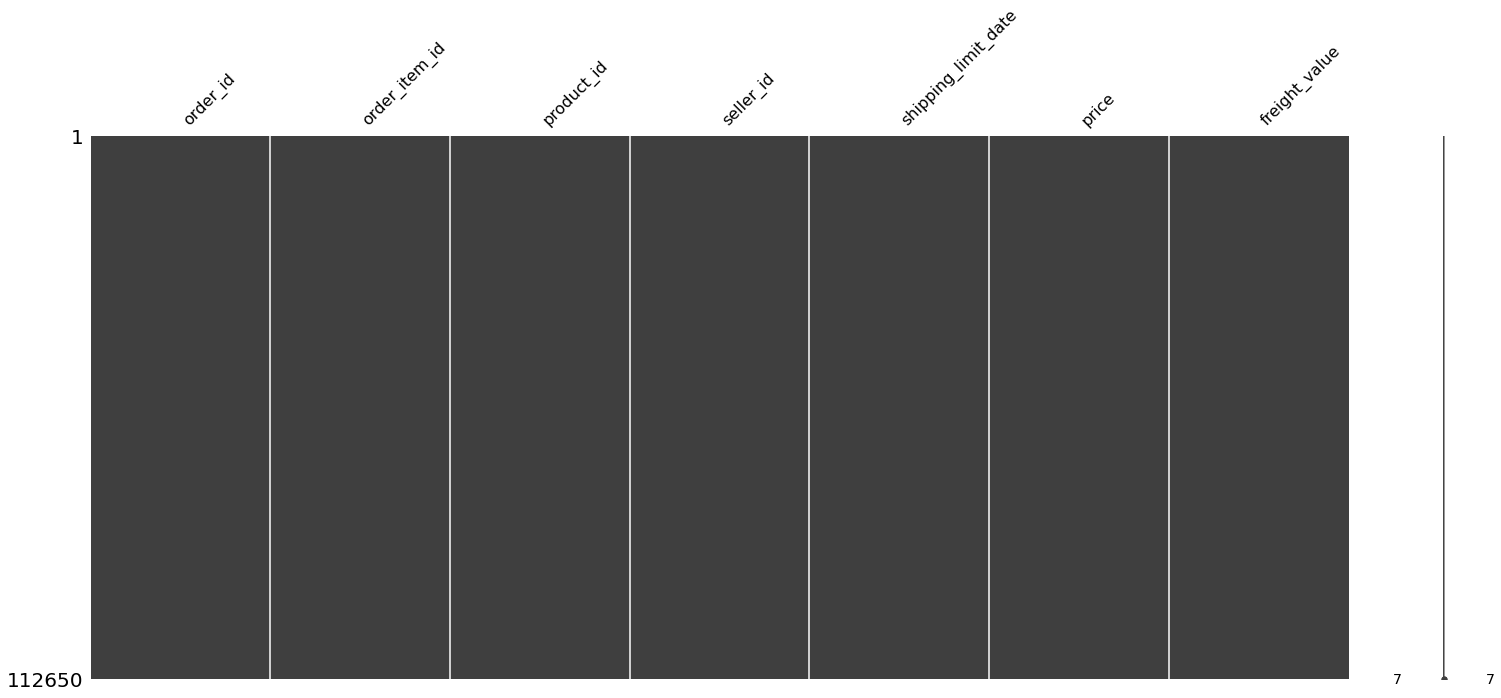

In [15]:
# Visualisation de la nulleté par colonne
msno.matrix(data_order)

In [16]:
# Structure de l'ensemble des données
data_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
# Liste des colonnes de data_order qui ont une seule modalité
[col for col in data_order.columns.to_list() if len (data_order[col].unique()) == 1]

[]

Ce dataset correspond aux lignes de commandes, On a pas de valeurs manquantes , ni de colonnes avec une seule modalité.

order_id : Identifiant unique de la commande

order_item_id : Identifiant séquentiel des items d'une même commande (lignes de commande)

product_id : Identifiant unique du produit

seller_id : Identifiant unique du vendeur

price : Prix de la ligne de commande

freight_value : Coût de fret de la ligne (Si plusieurs lignes, le coût de fret est réparti entre toutes les lignes)

In [18]:
# Afficher les 5 premiers lignes de la liste des moyens de payement
data_payement.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [19]:
data_payement.shape

(103886, 5)

<AxesSubplot:>

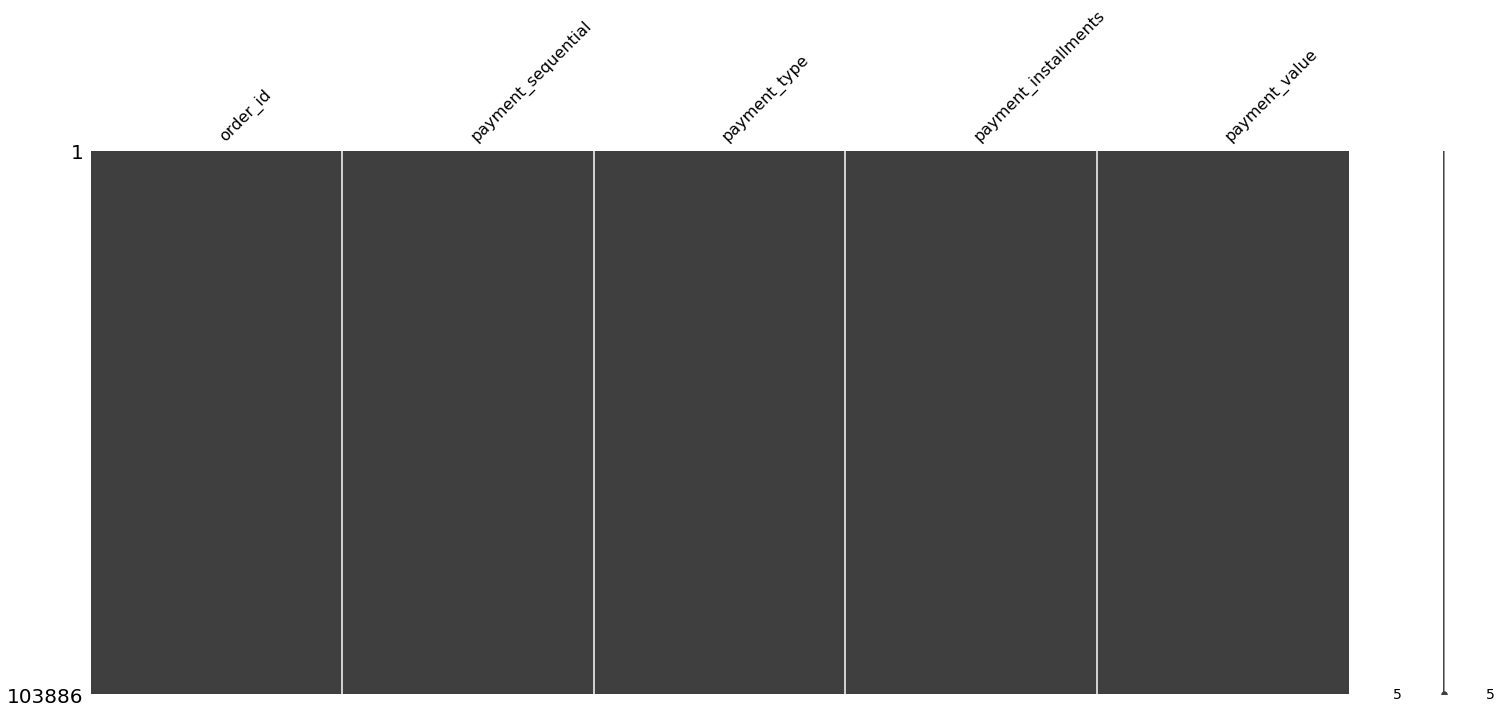

In [20]:
# Visualisation de la nulleté par colonne
msno.matrix(data_payement)

In [21]:
# Structure de l'ensemble des données
data_payement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
# Afficher les différents modalités
data_payement["payment_installments"].unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23], dtype=int64)

In [23]:
# Afficher les différents modalités
data_payement["payment_sequential"].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20], dtype=int64)

In [24]:
# Liste des colonnes de data_payement qui ont une seule modalité
[col for col in data_payement.columns.to_list() if len (data_payement[col].unique()) == 1]

[]

Ce dataset correspond au mode de payement avec absence de valeurs manquantes ni de colonnes avec une seule modalité.

payment_sequential : Si plusieurs méthodes de paiement appliquées, une ligne est crée par moyen utilisé.

payment_installments : Nombre de versements choisis

In [25]:
# Afficher les 5 premiers lignes de la liste d'avis sur les commandes d'oliste
data_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [26]:
data_reviews.shape

(99224, 7)

<AxesSubplot:>

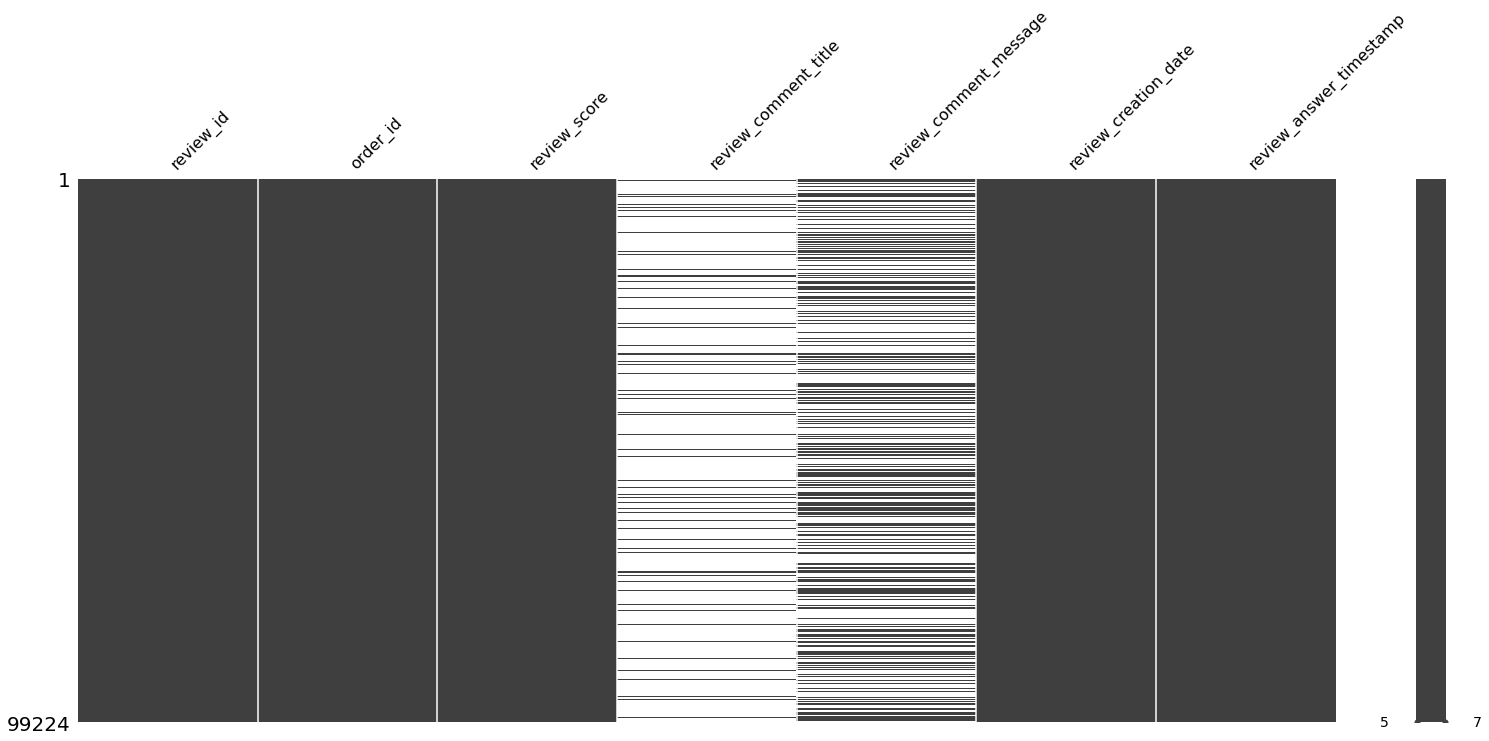

In [27]:
# Visualisation de la nulleté par colonne
msno.matrix(data_reviews)

In [28]:
# Structure de l'ensemble des données
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [29]:
# Liste des colonnes de data_reviews qui ont une seule modalité
[col for col in data_reviews.columns.to_list() if len (data_reviews[col].unique()) == 1]

[]

ce dataset correspond aux avis des clients liés à une commande avec des commmentaires.

On voit la présence de valeurs manquantes mais pas de colonnes avec une seule modalité.

In [30]:
# Afficher les 5 premiers lignes des commandes par liste
data_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [31]:
data_orders.shape

(99441, 8)

<AxesSubplot:>

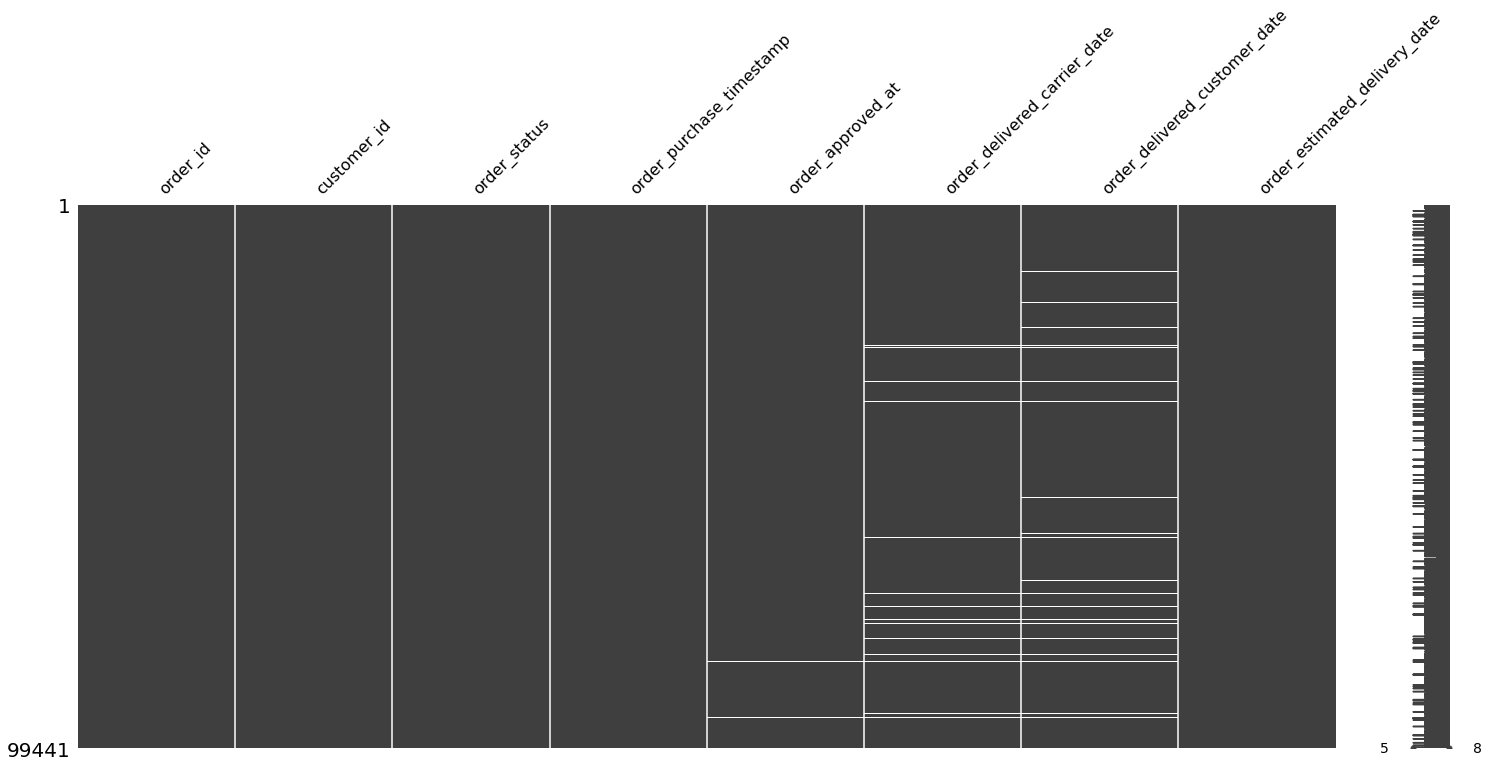

In [32]:
# Visualisation de la nulleté par colonne
msno.matrix(data_orders)

In [33]:
# Structure de l'ensemble des données
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [34]:
# Liste des colonnes de data_orders qui ont une seule modalité
[col for col in data_orders.columns.to_list() if len (data_orders[col].unique()) == 1]

[]

Ce dataset correspond aux entêtes de commandes, identifiées par un order_id unique et rattaché à un client par le customer_id.

Présence de valeurs manquantes et absence de colonnes avec une seule modalité.

In [35]:
# Afficher les 5 premiers lignes de la liste des produits
data_products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [36]:
data_products.shape

(32951, 9)

<AxesSubplot:>

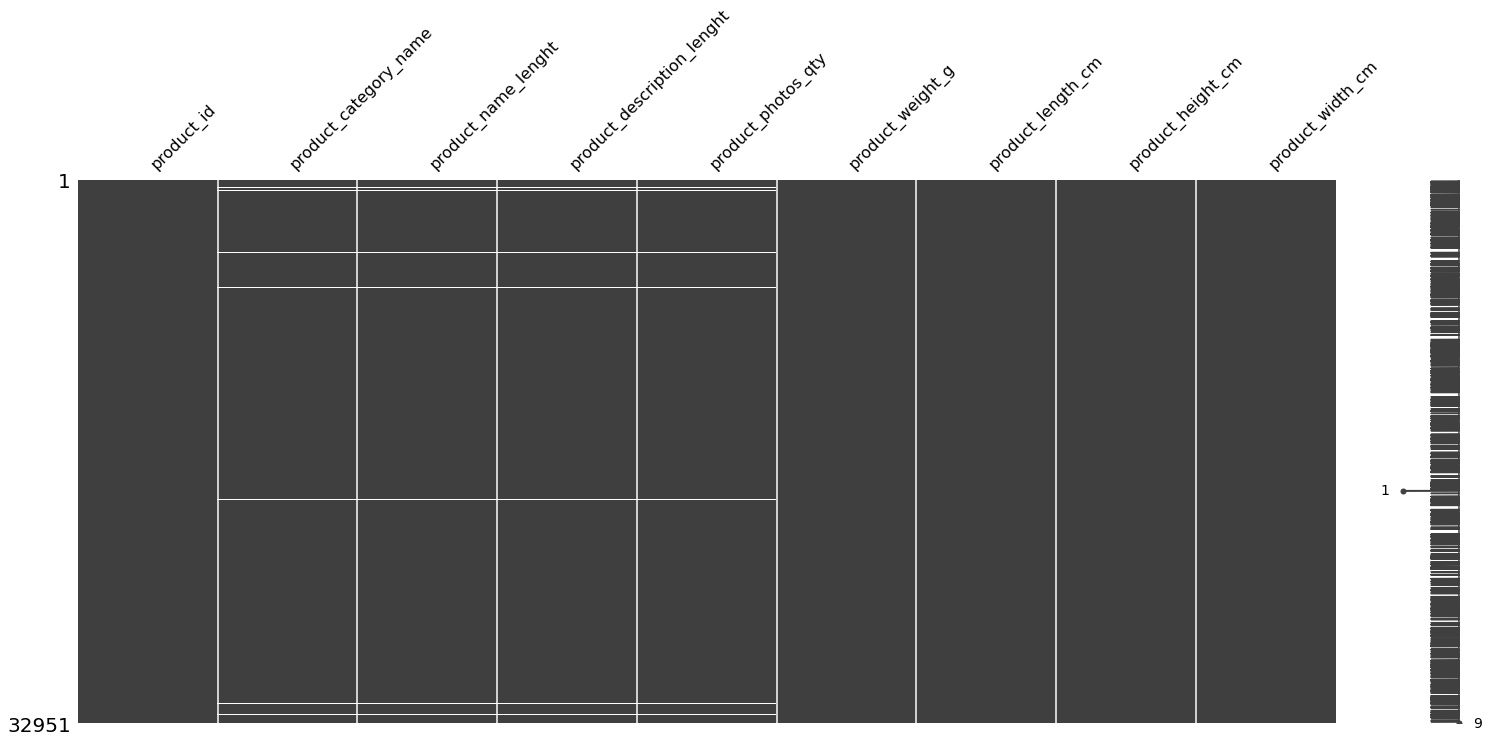

In [37]:
# Visualisation de la nulleté par colonne
msno.matrix(data_products)

In [38]:
# Structure de l'ensemble des données
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [39]:
# Liste des colonnes de data_products qui ont une seule modalité
[col for col in data_products.columns.to_list() if len (data_products[col].unique()) == 1]

[]

Ce dataset correspond aux catégories de produits avec certains caractéristiques, avec la présence de valeurs manquantes mais pas de colonnes avec une seule modalité.

In [40]:
# Afficher les 5 premiers lignes des vendeurs d'oliste
data_sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [41]:
data_sellers.shape

(3095, 4)

<AxesSubplot:>

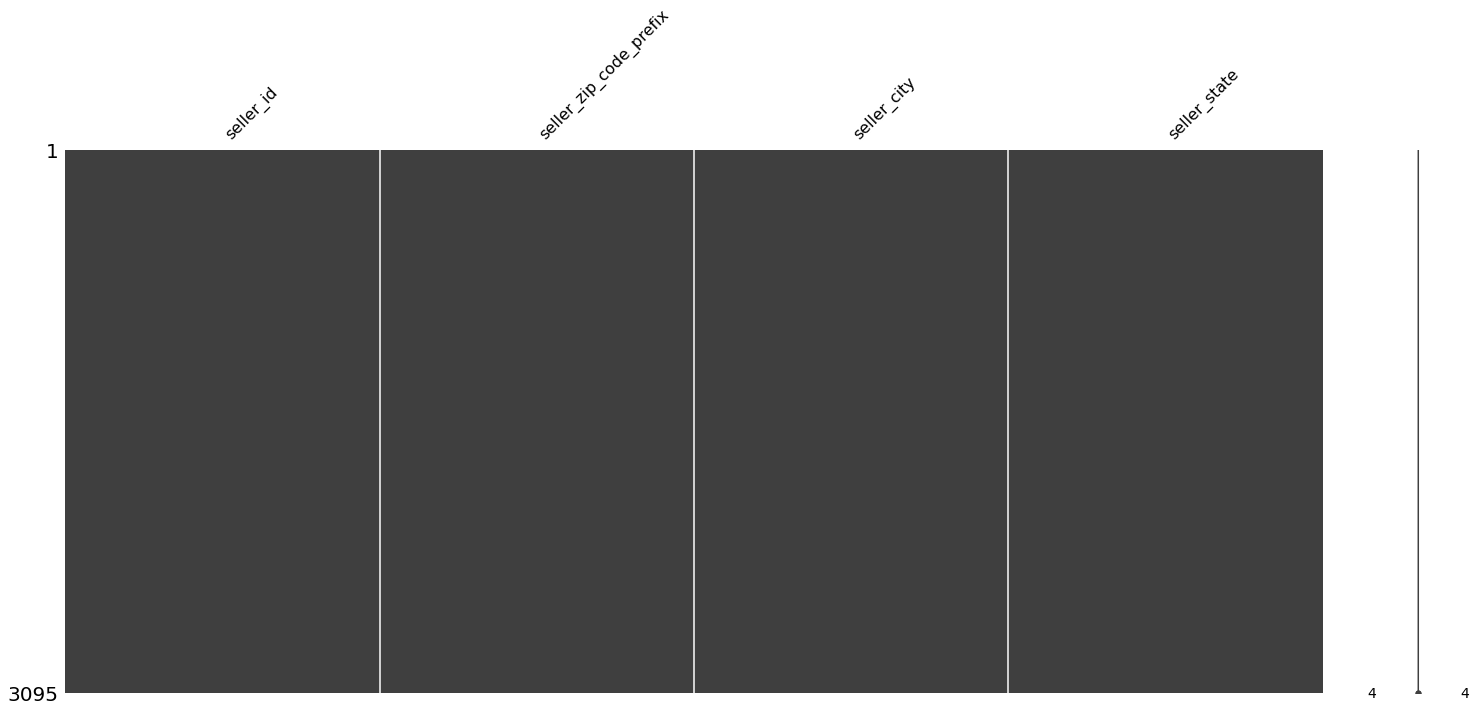

In [42]:
# Visualisation de la nulleté par colonne
msno.matrix(data_sellers)

In [43]:
# Structure de l'ensemble des données
data_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
# Liste des colonnes de data_sellers qui ont une seule modalité
[col for col in data_sellers.columns.to_list() if len (data_sellers[col].unique()) == 1]

[]

Ce dataset correspond aux vendeurs d'Oliste qui va pas nous être utile pour la suite de notre analyse.

Il n'y a pas de valeurs manquantes ni de colonnes avec une seule modalité.

In [45]:
# Afficher les 5 premiers lignes de la traduction du nom de la catégorie de produits
data_product_cat.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [46]:
data_product_cat.shape

(71, 2)

<AxesSubplot:>

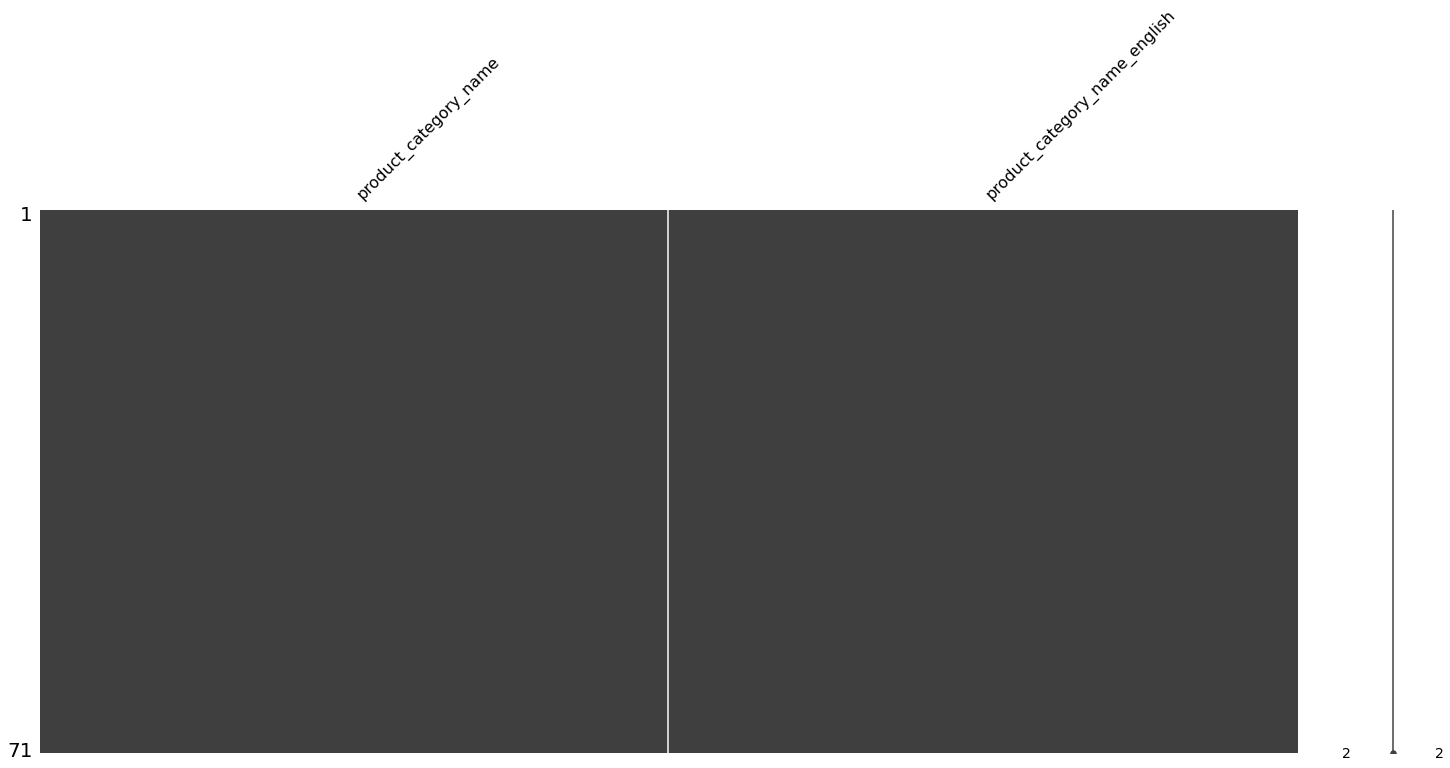

In [47]:
# Visualisation de la nulleté par colonne
msno.matrix(data_product_cat)

In [48]:
# Structure de l'ensemble des données
data_product_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [49]:
# Liste des colonnes de data_product_cat qui ont une seule modalité
[col for col in data_product_cat.columns.to_list() if len (data_product_cat[col].unique()) == 1]

[]

Ce dataset correspond à la traduction du catégories de produits.

Absence de valeurs manquantes , absence de colonnes avec une seule modalité.

In [50]:
data_product_cat["product_category_name_english"].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

# Création de nouveaux datasets

### Produits et catégories

Nous allons faire une jointure pour la création du nouveau jeu de données correspondant aux catégories de produits pour obetnir des datasets plus complés.

Nous allons nous reféré à la segmentation RFM qui prend en compte la Récence (date de la dernière commande), la Fréquence des commandes et le Montant (de la dernière commande ou sur une période donnée) pour établir des segments de clients homogènes.

In [51]:
# jointure des datasets
cat_products = pd.merge(data_products,data_product_cat, how = "left",
                    on = "product_category_name")

In [52]:
# A fficher les 5 premiers lignes
cat_products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [53]:
cat_products.shape

(32951, 10)

#### Suppression de colonnes inutiles

In [54]:
# Suppression des colonnes inutiles
cat_products = cat_products.drop(columns = ["product_category_name", "product_weight_g",
                     "product_length_cm", "product_height_cm",
                     "product_width_cm"])

In [55]:
# Renommer la colonne
cat_products = cat_products.rename(columns={"product_category_name_english":
                                    "product_category_name"})

In [56]:
# Afficher les 5 premiers lignes
cat_products.head(5)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,housewares


Visualisons les catégories de produits

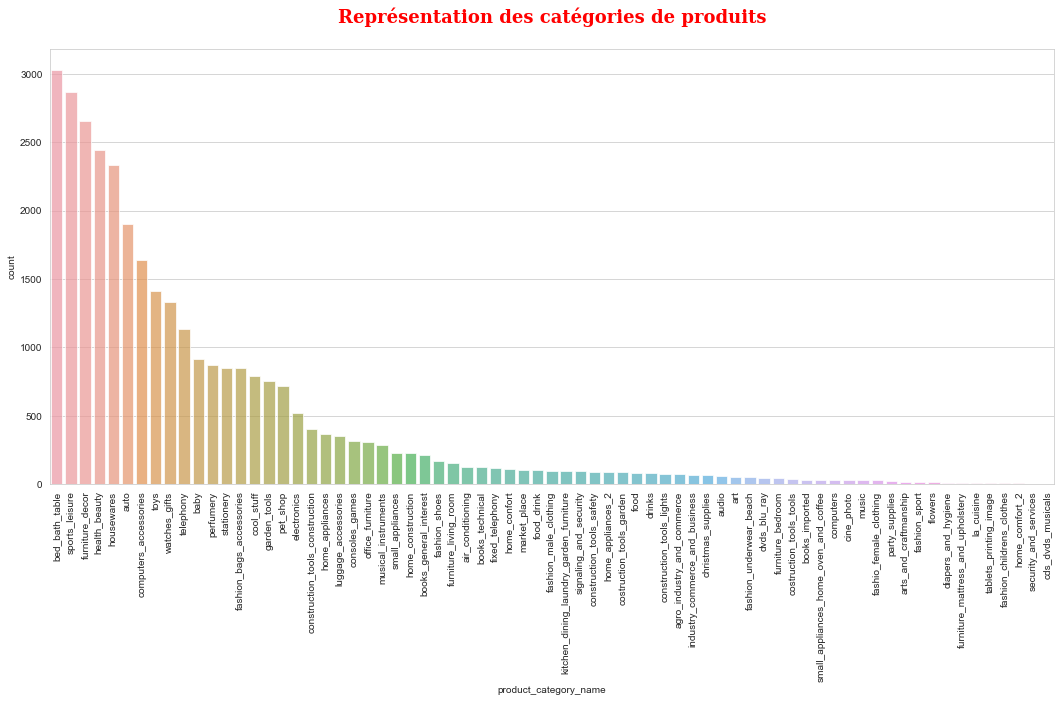

In [57]:
# Visualisation
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "red",
              "weight": "bold",
              "size": 18}
plt.figure(figsize=(18, 8))
sns.countplot(x="product_category_name", data = cat_products, alpha = 0.7,
              order = cat_products["product_category_name"].value_counts(ascending= False).index)
plt.xticks(rotation = 90);
plt.title(f"Représentation des catégories de produits\n", fontdict=font_title)
plt.show()

### Les commandes et clients

Jointure pour la création d'un nouveau dataset correspondant aux commandes et clients

In [58]:
# Jointure des deux datasets
orders_custumers = pd.merge(data_order, data_orders,  how = "left",
                       on = "order_id")

In [59]:
# Afficher les 5 premières lignes
orders_custumers.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


#### Suppression de colonnes inutiles

In [60]:
# Suppression des colonnes inutiles
orders_custumers = orders_custumers.drop(columns = ["seller_id", "shipping_limit_date",
                     "order_approved_at",
                     "order_delivered_carrier_date",
                     "order_estimated_delivery_date"])

In [61]:
# Afficher les 5 premières lignes
orders_custumers.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31


In [62]:
# Les différents types de modalité de statuts des commandes
orders_custumers["order_status"].unique()

array(['delivered', 'shipped', 'canceled', 'invoiced', 'processing',
       'approved', 'unavailable'], dtype=object)

In [63]:
# la valeur de chaque modalité
orders_custumers["order_status"].value_counts()

delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64

In [64]:
# Afficher le statut des commandes par identifiant
orders_custumers.groupby(by="order_status").sum()["order_item_id"]

order_status
approved            4
canceled          704
delivered      132036
invoiced          435
processing        455
shipped          1294
unavailable         8
Name: order_item_id, dtype: int64

On voit que les commandes délivrés sont plus nombreux par rapport aux autres, donc on pourra garder seulement cette option de "délivered".

In [65]:
# Conserver les lignes delivered
orders_custumers = orders_custumers[orders_custumers["order_status"] == "delivered"]

Visualisons le nombre de commandes passées par jour sur le site E-Commerce

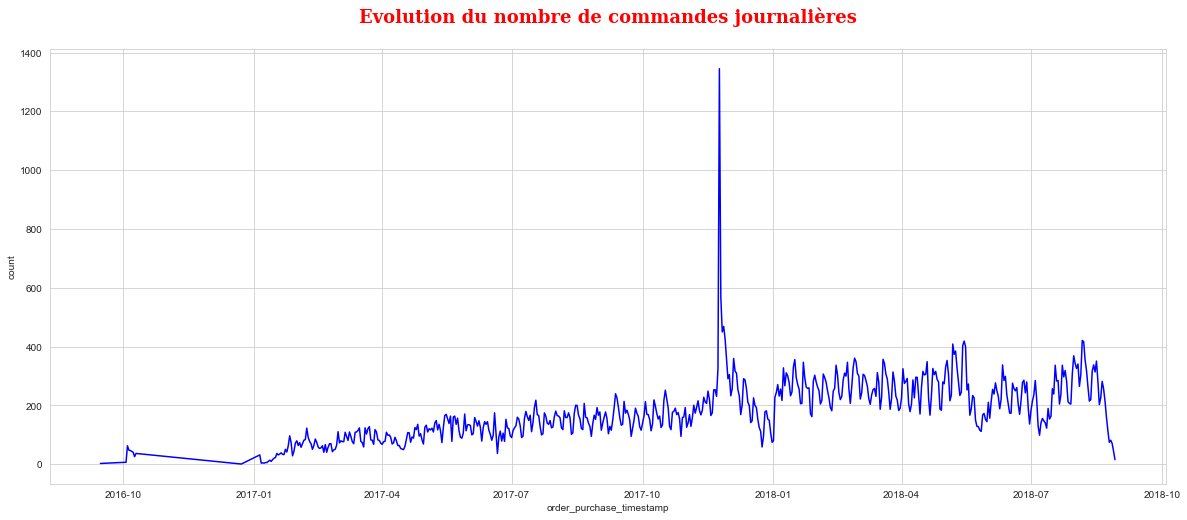

In [66]:
# Visualisation
order_day = orders_custumers.groupby(orders_custumers["order_purchase_timestamp"]\
                                         .astype('datetime64[ns]').dt.date)\
                                         .count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = order_day.plot(color="blue")
ax.set_ylabel("count")
plt.title(f"Evolution du nombre de commandes journalières\n",
          fontdict=font_title)
plt.show()

On voit un pic autour du mois de Novembre et Décembre 2017, ce qui correspond aux achats de cadeau de fin d'années 
tandisqu'on a pas de commandes entre Octobre 2016 et Janvier 2017.

Modifions les colonnes qui correspondent au format datetime au lieu d'être considéré comme object.

In [67]:
# Modification des colonnes
datetime_columns = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_columns:
    orders_custumers[col] = orders_custumers[col].astype("datetime64[ns]")

In [68]:
orders_custumers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 8.4+ MB


Visualisons la répartition du nombre de commandes par heure de la journée, par jour de la semaine, ainsi par mois 

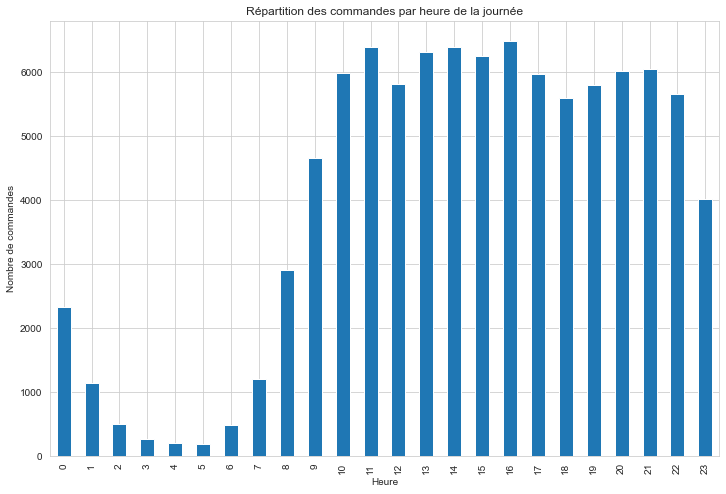

In [69]:
# Visualisation des commandes par heure de la journée
orders_custumers.groupby(orders_custumers['order_purchase_timestamp'].dt.hour)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par heure de la journée",
          ylabel="Nombre de commandes",
          xlabel="Heure",
          legend=False)
plt.show()

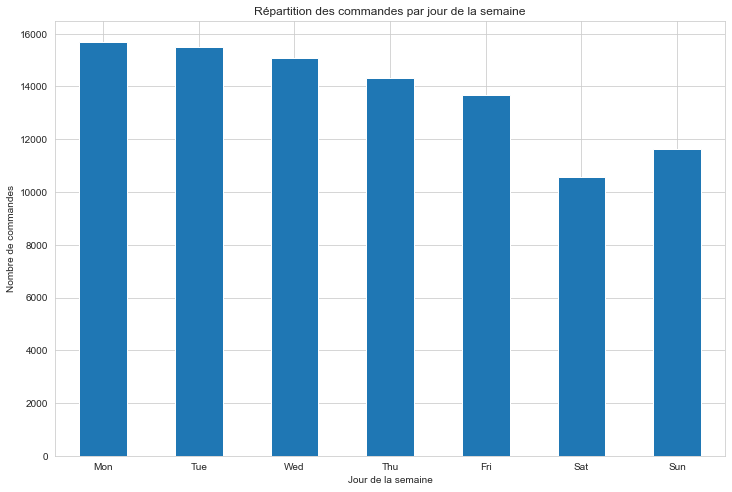

In [70]:
# Visualisation des commandes par jour de la semaine
orders_custumers.groupby(orders_custumers['order_purchase_timestamp'].dt.dayofweek)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par jour de la semaine",
          ylabel="Nombre de commandes",
          xlabel="Jour de la semaine",
          legend=False)
plt.xticks(np.arange(0,7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation='horizontal')
plt.show()

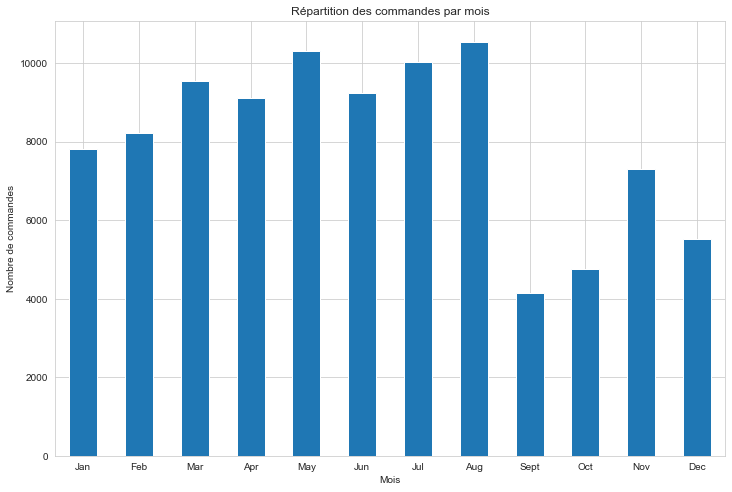

In [71]:
# Visualisation des commandes par mois
orders_custumers.groupby(orders_custumers['order_purchase_timestamp'].dt.month)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par mois",
          ylabel="Nombre de commandes",
          xlabel="Mois",
          legend=False)
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'], 
           rotation='horizontal')
plt.show()

On remarque des écarts pour chacun des commandes que ça soit par heure, par jour ou par mois.

Visualisons les chiffres d'affaires sur les mois de l'années.

In [72]:
orders_custumers["price"].value_counts().to_list()

[2445,
 1950,
 1918,
 1519,
 1406,
 1310,
 1301,
 1189,
 1185,
 1162,
 1147,
 943,
 865,
 785,
 725,
 721,
 674,
 666,
 657,
 643,
 638,
 631,
 626,
 608,
 593,
 589,
 572,
 569,
 568,
 547,
 528,
 527,
 524,
 508,
 502,
 499,
 496,
 490,
 490,
 489,
 488,
 475,
 469,
 459,
 458,
 450,
 448,
 447,
 437,
 428,
 426,
 413,
 406,
 402,
 391,
 385,
 380,
 378,
 377,
 360,
 359,
 358,
 345,
 334,
 334,
 333,
 327,
 321,
 305,
 301,
 301,
 301,
 299,
 298,
 290,
 286,
 286,
 281,
 278,
 273,
 265,
 265,
 265,
 260,
 258,
 248,
 247,
 247,
 243,
 243,
 242,
 242,
 242,
 236,
 233,
 229,
 228,
 227,
 224,
 218,
 216,
 216,
 214,
 212,
 211,
 211,
 209,
 208,
 205,
 204,
 203,
 202,
 201,
 201,
 200,
 196,
 194,
 192,
 191,
 189,
 188,
 188,
 184,
 184,
 180,
 178,
 178,
 176,
 176,
 172,
 171,
 170,
 169,
 168,
 166,
 165,
 162,
 161,
 158,
 158,
 157,
 156,
 156,
 156,
 156,
 153,
 152,
 151,
 148,
 147,
 147,
 147,
 147,
 147,
 146,
 146,
 145,
 144,
 144,
 144,
 143,
 142,
 142,
 141,
 139,

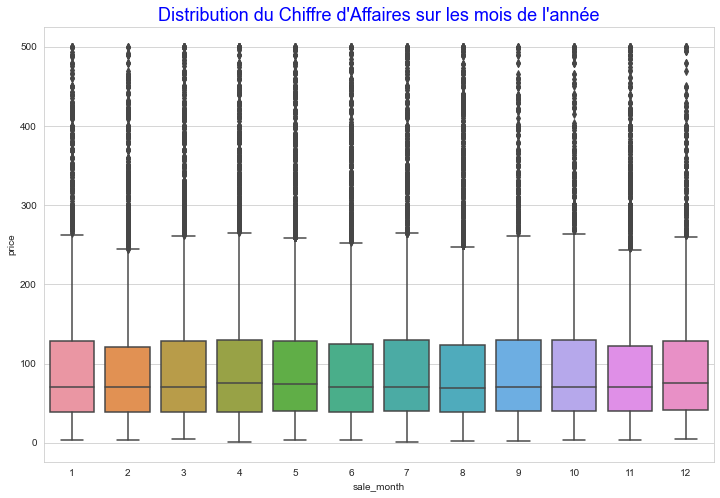

In [73]:
# Répartition des chiffres d'affaires sur les mois de l'année
orders_custumers["sale_month"] = orders_custumers['order_purchase_timestamp'].dt.month
fig = plt.figure(figsize=(12,8))
sns.boxplot(data=orders_custumers[orders_custumers.price < 500], x="sale_month", y="price")
plt.title("Distribution du Chiffre d'Affaires sur les mois de l'année", fontsize=18, color="b")
plt.show()

On voit que le prix des produits n'a pas d'effet sur le chiffre d'affaire, on a pratiquement la même distribution sur les 12 mois mais on pourra l'exploiter pour le contrat de maintenance.

### Moyens de payement

Création de nouvelles variables avec :

Le nombre de moyens de paiement différents utilisés sur la commande.

Le nombre d'échéances totales de la commande.

In [74]:
# Création de nouvelles variables
average_payment = data_payement.groupby(by = "order_id").agg(
    {"payment_sequential": 'count',
     "payment_installments": 'sum'})

In [75]:
# Afficher les nouvelles variables
average_payment.head()

,payment_sequential,payment_installments
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,1,2
00018f77f2f0320c557190d7a144bdd3,1,3
000229ec398224ef6ca0657da4fc703e,1,5
00024acbcdf0a6daa1e931b038114c75,1,2
00042b26cf59d7ce69dfabb4e55b4fd9,1,3


In [76]:
# Jointure des deux datasets 
orders_custumers = pd.merge(orders_custumers,average_payment, how = "left",
                       on = "order_id")

In [77]:
# Renommer les colonnes
orders_custumers = orders_custumers.rename(columns={
    "payment_sequential": "nb_payment_sequential",
    "payment_installments": "sum_payment_installments"})

In [78]:
# Afficher les 5 premières lignes
orders_custumers.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0


Vérifions la répartition des moyens de payement utilisés sur le site pour la suite de l'analyse

In [79]:
# Les différentes types de modalités
data_payement["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

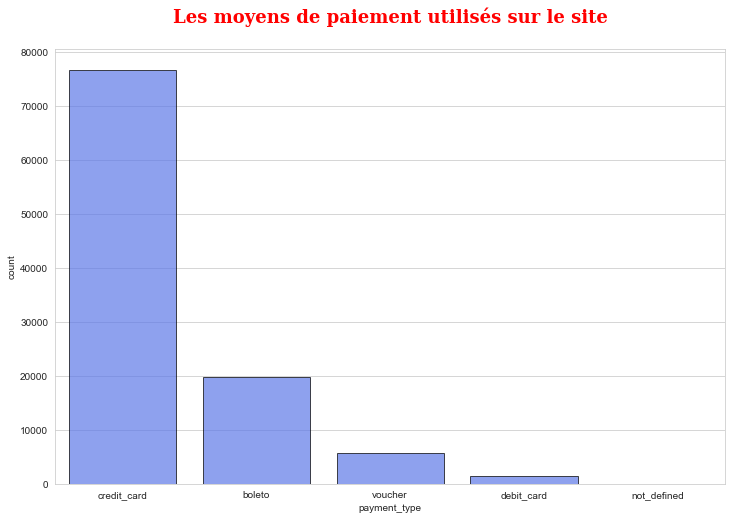

In [80]:
# Visualisation Les moyens de paiement utilisés sur le site
fig = plt.figure(figsize=(12, 8))
sns.countplot(data = data_payement, x = "payment_type",
              edgecolor = "black",
              color = "#476bff", alpha = 0.7)
plt.title(f"Les moyens de paiement utilisés sur le site\n",
          fontdict=font_title)
plt.show()

On voit la plus part des payements se fait par carte bancaire par rapport aux autres moyens de payement.
Nous ne prendrons donc pas en considération cette variable dans nos explorations.

Intéressons nous aux variables qui donnent les avis clients sur les commandes si oui ou non la commande a été notée(True or False) et une seconde variable qui reprendra la note attribuée.

In [81]:
# Les différentes types de modalités
data_reviews["review_id"].unique()

array(['7bc2406110b926393aa56f80a40eba40',
       '80e641a11e56f04c1ad469d5645fdfde',
       '228ce5500dc1d8e020d8d1322874b6f0', ...,
       'b3de70c89b1510c4cd3d0649fd302472',
       '1adeb9d84d72fe4e337617733eb85149',
       'efe49f1d6f951dd88b51e6ccd4cc548f'], dtype=object)

In [82]:
# Les différentes types de modalités
data_reviews["review_score"].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [83]:
Customer_reviews =  data_reviews.groupby("order_id").agg({
    "review_id": "count",
    "review_score": "mean"})

In [84]:
# Afficher les avis clients
Customer_reviews.head()

,review_id,review_score
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,1,5.0
00018f77f2f0320c557190d7a144bdd3,1,4.0
000229ec398224ef6ca0657da4fc703e,1,5.0
00024acbcdf0a6daa1e931b038114c75,1,4.0
00042b26cf59d7ce69dfabb4e55b4fd9,1,5.0


In [85]:
# Jointure des deux datasets et renommons une colonne
orders_custumers = pd.merge(orders_custumers, Customer_reviews, how = "left",
                       on = "order_id")
orders_custumers = orders_custumers.rename(columns = {"review_id": "is_reviewed"})

In [86]:
# Afficher les 5 premières lignes aprés la jointure
orders_custumers.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0,1.0,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0,1.0,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0,1.0,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0,1.0,5.0


In [87]:
# Vérification des notes puis attribution de True or False
orders_custumers["is_reviewed"] = np.where(orders_custumers["is_reviewed"] == 1,
                                      True, False)

In [88]:
# Afficher les 5 premières lignes
orders_custumers.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0,True,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0,True,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0,True,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0,True,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0,True,5.0


Visualisons la répartition des notes attribuées aux commandes

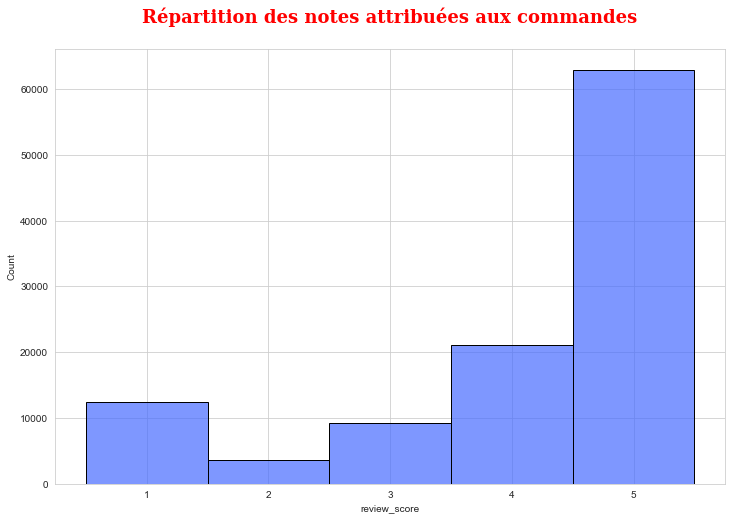

In [89]:
# Visualisation des notes attribuées aux commandes
fig = plt.figure(figsize=(12, 8))
sns.histplot(data  = orders_custumers, x = "review_score", 
             discrete = True,
             edgecolor = "black",
             color = "#476bff", alpha = 0.7)
plt.title(f"Répartition des notes attribuées aux commandes\n",
          fontdict=font_title)
plt.show()

Interressons nous au dataset correspondant aux clients et faisons sa jointure 

In [90]:
# Jointure des datasets
orders_custumers = pd.merge(orders_custumers, data_customers,
                       how = "left",
                       on = "customer_id")
orders_custumers.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0,True,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0,True,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0,True,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0,True,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0,True,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


Enfin la jointure du dataset correspondant aux catégories de produits pour obtenir un dataset global

In [91]:
# Jointure
data_global = pd.merge(orders_custumers, cat_products,
               how="left",
               on="product_id")
data_global.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,...,is_reviewed,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,...,True,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,58.0,598.0,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,...,True,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,56.0,239.0,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,...,True,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,59.0,695.0,2.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,...,True,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,42.0,480.0,1.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,...,True,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59.0,409.0,1.0,garden_tools


In [92]:
data_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
 9   sale_month                     110197 non-null  int64         
 10  nb_payment_sequential          110194 non-null  float64       
 11  

# Feature engineering : Creation de nouvelles variables

Maintenant que nous avons un dataset global, nous pourrons nous focaliser sur les clients avec leur identifiant unique.

customer_unique_id = identifant unique pour chaque client

Créons une variable qui va correspondre au delai de livraison de chaque commande.

In [93]:
# Création de la nouvelle variable
data_global["delivery_time"] = (data_global["order_delivered_customer_date"] - data_global["order_purchase_timestamp"])\
                                             .dt.round('1d').dt.days

In [94]:
data_global["delivery_time"].value_counts()

7.0      8542
8.0      8259
6.0      7434
9.0      7129
10.0     6671
         ... 
191.0       1
208.0       1
115.0       1
196.0       1
143.0       1
Name: delivery_time, Length: 144, dtype: int64

In [95]:
# Suppression de la colonne de la date de livraison
data_global = data_global.drop(columns = ["order_delivered_customer_date"])

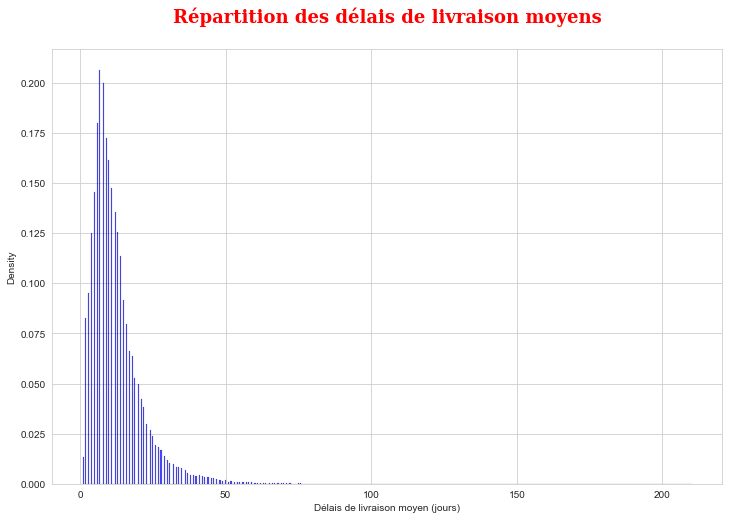

In [96]:
# Visualisation des délais de livraison moyens
fig = plt.figure(figsize=(12, 8))
sns.histplot(data = data_global, x = "delivery_time",
             stat = "density",
             edgecolor = "black",
             color = "blue", alpha = 0.7)
plt.xlabel("Délais de livraison moyen (jours)")
plt.title(f"Répartition des délais de livraison moyens\n",
          fontdict=font_title)
plt.show()

En moyenne les délais de livraisons sont de 12 jours et demi

Interressons nous encore aux catégories de produits, d'aprés la visualisation on a pas mal de types de produits.

Nous allons essayer de les regrouper et pour chaque produit de lui faire correspondre à un groupe de catégories pour 

nous faciler la tâche à la suite de l'analyse

In [97]:
# Afficher les différentes types de modalités
data_global["product_category_name"].unique()

array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery',
       'industry_commerce_and_business', 'watches_gifts', 'auto', nan,
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_confort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tools_safety', 'c

In [98]:
data_global["product_category_name"].nunique()

71

In [99]:
# Afficher le nombre de chaque modalité
data_global["product_category_name"].value_counts()

bed_bath_table               10953
health_beauty                 9465
sports_leisure                8431
furniture_decor               8160
computers_accessories         7644
                             ...  
arts_and_craftmanship           24
la_cuisine                      14
cds_dvds_musicals               14
fashion_childrens_clothes        7
security_and_services            2
Name: product_category_name, Length: 71, dtype: int64

Nous allons nous baser sur les catégories principales des sites de vente en ligne en 2017, disponibles sur le site https://www.statista.com/statistics/311406/us-online-shopping-categories-gender/  :

Fashion, clothing and accessories

Health and Beauty

Toys and baby equipment

Books, CDs and other physical media

Groceries, food and drink

Technology (including phones and computers)

Home and furniture

Flowers and gifts

Other

et nous ajoutons la catégorie sport

Nous allons devoir les attribuer manuellement :

In [101]:
data_global["category_products"] = np.where((data_global['product_category_name'].str.contains("fashio|luggage")==True),
                                    'fashion_clothing_accessories',
                           np.where((data_global['product_category_name'].str.contains("health|beauty|perfum")==True),
                                    'health_beauty',
                           np.where((data_global['product_category_name'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                           np.where((data_global['product_category_name'].str.contains("book|cd|dvd|media")==True),
                                     'books_cds_media',
                           np.where((data_global['product_category_name'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink',
                           np.where((data_global['product_category_name'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technology',
                           np.where((data_global['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                                                                          'home_furniture',
                           np.where((data_global['product_category_name'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                           np.where((data_global['product_category_name'].str.contains("sport")==True),
                                     'sport',
                                     'other')))))))))

In [102]:
# Suppression de la colonne 
data_global = data_global.drop(columns=["product_category_name"])

Visualisons maintenant les catégories de produits aprés création de catégories de produits par groupe

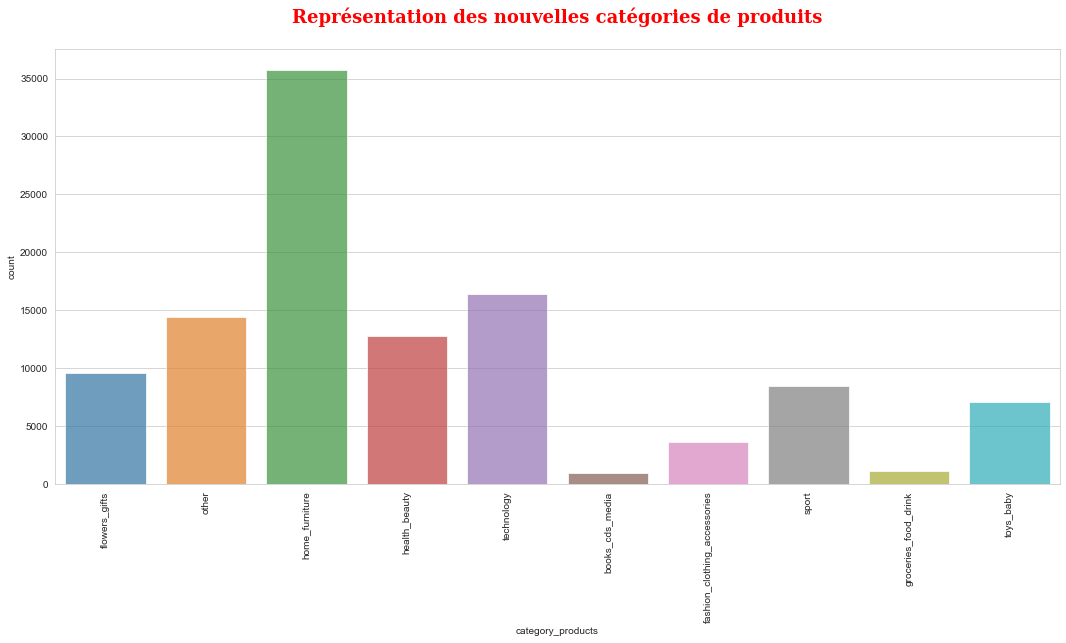

In [103]:
# Visualisation des nouvelles catégories de produits
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "red",
              "weight": "bold",
              "size": 18}
plt.figure(figsize=(18, 8))
sns.countplot(x = "category_products", data = data_global, alpha = 0.7)
plt.xticks(rotation = 90);
plt.title(f"Représentation des nouvelles catégories de produits\n", fontdict=font_title)
plt.show()

On voit la catégorie Home_Fourniture qui est la la plus représentée par rapport aux autres catégories de produits

Visualisons le nombre de clients par commande avec chacun son identiiant unique

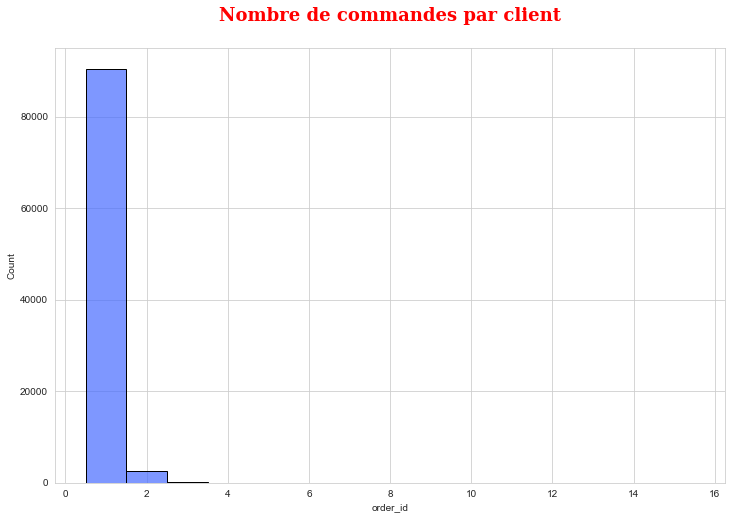

In [104]:
# Visualisation du Nombre de commandes par client
fig = plt.figure(figsize=(12, 8))
sns.histplot(data = data_global.groupby("customer_unique_id").agg({"order_id": "nunique"}), 
             x = "order_id", 
             discrete = True,
             edgecolor = "black",
             color = "#476bff", alpha = 0.7)
plt.title(f"Nombre de commandes par client\n",
          fontdict=font_title)
plt.show()

La majeure partie des clients ont passé une fois leur commande en ligne, donc il sera compliqué de faire le classement de leurs catégories de produits préférés.

Nous allons créer une nouvelle variable par catégorie de client pour y distribuer le nombre de produits achetés sur les commandes passées.

Ensuite, nous allons calculer le rapport du nombre de produits par catégorie sur le nombre de produit total acheté par client.

In [106]:
# Création de la variable catégorie de client
customer_category = data_global.groupby(["customer_unique_id", "category_products"])\
                                     .agg({"order_item_id": "count"}).unstack()
customer_category.head()

order_item_id                               \
category_products                books_cds_media fashion_clothing_accessories   
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2             NaN                          NaN   
0000b849f77a49e4a4ce2b2a4ca5be3f             NaN                          NaN   
0000f46a3911fa3c0805444483337064             NaN                          NaN   
0000f6ccb0745a6a4b88665a16c9f078             NaN                          NaN   
0004aac84e0df4da2b147fca70cf8255             NaN                          NaN   

                                                                     \
category_products                flowers_gifts groceries_food_drink   
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2           NaN                  NaN   
0000b849f77a49e4a4ce2b2a4ca5be3f           NaN                  NaN   
0000f46a3911fa3c0805444483337064           NaN                  NaN   
0000f6ccb0745a6a4b88665a16c9f078           NaN                  NaN   
0004aac84e0df4da2b147fca70cf8255           NaN                  NaN   

                                                                           \
category_products                health_beauty home_furniture other sport   
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2           NaN            1.0   NaN   NaN   
0000b849f77a49e4a4ce2b2a4ca5be3f           1.0            NaN   NaN   NaN   
0000f46a3911fa3c0805444483337064           NaN            NaN   1.0   NaN   
0000f6ccb0745a6a4b88665a16c9f078           NaN            NaN   NaN   NaN   
0004aac84e0df4da2b147fca70cf8255           NaN            NaN   NaN   NaN   

                                                       
category_products                technology toys_baby  
customer_unique_id                                     
0000366f3b9a7992bf8c76cfdf3221e2        NaN       NaN  
0000b849f77a49e4a4ce2b2a4ca5be3f        NaN       NaN  
0000f46a3911fa3c0805444483337064        NaN       NaN  
0000f6ccb0745a6a4b88665a16c9f078        1.0       NaN  
0004aac84e0df4da2b147fca70cf8255        1.0       NaN

In [107]:
# Création de la variable nombre de produits total
customer_category.columns = customer_category.columns.droplevel(0)
customer_category.fillna(0, inplace=True)
customer_category["total_items"] = customer_category.sum(axis=1)

Faisons le rapport 

In [108]:
for col in customer_category.columns:
    if (col != "total_items"):
        customer_category[col] = (customer_category[col]/customer_category["total_items"])

customer_category.reset_index(inplace=True)
customer_category.head()

category_products,customer_unique_id,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Nous allons ensuite calculer le nombre moyen d'articles par commande pour chaque client

In [109]:
orders_products = data_global.groupby(["customer_unique_id", "order_id"])\
                        .agg({"order_item_id": "count"})
orders_products_mean = orders_products.groupby("customer_unique_id")\
                        .agg({"order_item_id": "mean"})

Passons à la visualisation

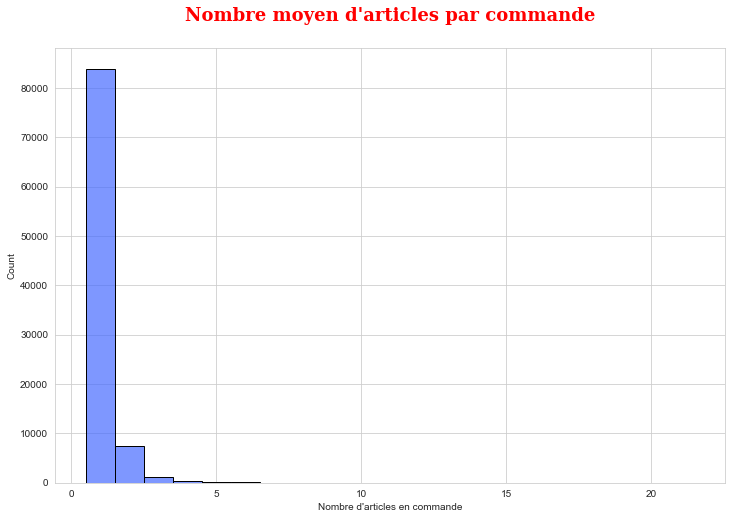

In [110]:
# Visualisation du Nombre moyen d'articles par commande
fig = plt.figure(figsize = (12, 8))
sns.histplot(data = orders_products_mean,
             x = "order_item_id",
             discrete = True,
             edgecolor = "black",
             color = "#476bff", alpha = 0.7)
plt.xlabel("Nombre d'articles en commande")
plt.title(f"Nombre moyen d'articles par commande\n",
          fontdict = font_title)
plt.show()

En moyenne le nombre d'article par commande est de 1

Création d'une nouvelle variable qui correspond au nombre de jours écoulés entre la première et la dernière commande

In [111]:
# Création de la nouvelle variable
number_days = data_global.groupby("customer_unique_id")\
                .agg({"order_purchase_timestamp": ["min","max"]})

In [112]:
number_days.head()

order_purchase_timestamp                    
                                                      min                 max
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27 2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27 2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03 2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41 2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42 2017-11-14 19:45:42

In [113]:
number_days.columns = number_days.columns.droplevel(0)
number_days.columns

Index(['min', 'max'], dtype='object')

In [114]:
# Afficher la date du dataset
max_date = data_global["order_purchase_timestamp"].max()
max_date

Timestamp('2018-08-29 15:00:37')

In [115]:
# Afficher la date depuis la dernière commande
number_days["delay_total_orders"] = [(y[1] - y[0]).round('1d').days if y[1] != y[0] 
                                    else (max_date - y[0]).round('1d').days 
                                    for x,y in number_days.iterrows()]
number_days.drop(["min", "max"], axis=1, inplace=True)
number_days.head()

,delay_total_orders
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,111
0000b849f77a49e4a4ce2b2a4ca5be3f,114
0000f46a3911fa3c0805444483337064,537
0000f6ccb0745a6a4b88665a16c9f078,321
0004aac84e0df4da2b147fca70cf8255,288


Interressons nous maintenant au dataset des clients

### Création du dataset clients

In [116]:
# Regrouper les clients par la sommme ou la moyenne
data_global = data_global.groupby("customer_unique_id")\
            .agg({"order_id": "nunique",
                  "price": "sum",
                  "freight_value": "sum",
                  "nb_payment_sequential": "mean", 
                  "sum_payment_installments": "mean", 
                  "review_score": "mean",
                  "delivery_time": "mean",
                  "sale_month": lambda x:x.value_counts().index[0]})

In [117]:
data_global.head(5)

,order_id,price,freight_value,nb_payment_sequential,sum_payment_installments,review_score,delivery_time,sale_month
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,1.0,8.0,5.0,6.0,5
0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,1.0,1.0,4.0,3.0,5
0000f46a3911fa3c0805444483337064,1,69.00,17.22,1.0,8.0,3.0,26.0,3
0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,1.0,4.0,4.0,20.0,10
0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,1.0,6.0,5.0,13.0,11


In [118]:
# Renommer quelques colonnes aprés le regroument
data_global = data_global.rename(columns={"order_id": "nb_orders",
                            "price": "total_spend",
                            "freight_value": "total_freight",
                            "nb_payment_sequential": "mean_payment_sequential",
                            "sum_payment_installments": "mean_payment_installments",
                            "review_score": "mean_review_score",
                            "delivery_time": "mean_delivery_days",
                            "sale_month": "favorite_sale_month"})

In [119]:
data_global.head(5)

,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,1.0,8.0,5.0,6.0,5
0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,1.0,1.0,4.0,3.0,5
0000f46a3911fa3c0805444483337064,1,69.00,17.22,1.0,8.0,3.0,26.0,3
0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,1.0,4.0,4.0,20.0,10
0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,1.0,6.0,5.0,13.0,11


Ensuite on fait la jointure avec 3 datasets qui sont : 

customer_category = Catégories de produits par client

orders_products_mean = Nombre moyen d'articles par commande

number_days = Nombre de jours(délai) entre la première et la dernière commande

In [120]:
# Jointure des datasets
data_global = pd.merge(data_global, customer_category,
                how="left",
                on="customer_unique_id")

data_global = pd.merge(data_global, orders_products_mean,
                how="left",
                on="customer_unique_id")\
        .rename(columns={"order_item_id": "mean_nb_items"})

data_global = pd.merge(data_global, number_days,
                how="left",
                on="customer_unique_id")

data_global.head()

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,...,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,mean_nb_items,delay_total_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,1.0,8.0,5.0,6.0,5,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,1.0,1.0,4.0,3.0,5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,114
2,0000f46a3911fa3c0805444483337064,1,69.00,17.22,1.0,8.0,3.0,26.0,3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,1.0,4.0,4.0,20.0,10,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,321
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,1.0,6.0,5.0,13.0,11,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,288


In [121]:
data_global["nb_orders"].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 15], dtype=int64)

In [122]:
data_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93358 entries, 0 to 93357
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93358 non-null  object 
 1   nb_orders                     93358 non-null  int64  
 2   total_spend                   93358 non-null  float64
 3   total_freight                 93358 non-null  float64
 4   mean_payment_sequential       93357 non-null  float64
 5   mean_payment_installments     93357 non-null  float64
 6   mean_review_score             92755 non-null  float64
 7   mean_delivery_days            93350 non-null  float64
 8   favorite_sale_month           93358 non-null  int64  
 9   books_cds_media               93358 non-null  float64
 10  fashion_clothing_accessories  93358 non-null  float64
 11  flowers_gifts                 93358 non-null  float64
 12  groceries_food_drink          93358 non-null  float64
 13  h

Comme la plus part des clients ont passé commande une fois par semaine , ainsi on pourra pas savoir leur produit favori.

Pour avoir le délai moyen entre plusieurs achats, nous allons ramener le délai des commandes client en fonction du nombre de commandes .

In [123]:
# Faisons le ratio 
data_global["delay_total_orders"] = data_global["delay_total_orders"] / data_global["nb_orders"]

# Renommer la colonne
data_global = data_global.rename(columns = {"delay_total_orders" : "delay_mean_orders" })

Il nous reste à présent à calculer quelques dernières variables plus représentatives :

Le ratio fret / total commande

le prix moyen par commande

In [124]:
data_global["freight_ratio"] = round(data_global["total_freight"] / (data_global["total_spend"] + data_global["total_freight"]),2)
data_global["mean_price_order"] = round(data_global["total_spend"] / data_global["nb_orders"],2)
data_global["total_spend"] = (data_global["total_spend"] + data_global["total_freight"])
data_global.drop("total_freight", axis=1, inplace=True)

Enfin, interressons nous aux données géographiques(localisations) des clients pour obtenir le dataset final.

In [125]:
data_customers = data_customers.drop(columns = ["customer_id"])
data_customers.head(5)
#data_global.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [126]:
data_customers = data_customers.groupby("customer_unique_id").agg(lambda x:x.value_counts().index[0])
data_customers.head(5)

,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP
0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP
0000f46a3911fa3c0805444483337064,88115,sao jose,SC
0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA
0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP


In [127]:
# Jointure des deux datasets 
data_final = pd.merge(data_global, data_customers,  how = "left",
                on = "customer_unique_id" )
pd.set_option("display.max_rows",data_final.shape[0]+1)
data_final.head()

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,delay_mean_orders,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,111.0,0.08,129.90,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,114.0,0.30,18.90,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,0.0,0.0,...,0.0,0.0,1.0,1.0,537.0,0.20,69.00,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,10,0.0,0.0,...,1.0,0.0,1.0,1.0,321.0,0.40,25.99,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,13.0,11,0.0,0.0,...,1.0,0.0,1.0,1.0,288.0,0.09,180.00,18040,sorocaba,SP


# Exploration des données

Nous avons notre dataset final, passons à une rapide exploration des données des clients.

In [128]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93358 entries, 0 to 93357
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93358 non-null  object 
 1   nb_orders                     93358 non-null  int64  
 2   total_spend                   93358 non-null  float64
 3   mean_payment_sequential       93357 non-null  float64
 4   mean_payment_installments     93357 non-null  float64
 5   mean_review_score             92755 non-null  float64
 6   mean_delivery_days            93350 non-null  float64
 7   favorite_sale_month           93358 non-null  int64  
 8   books_cds_media               93358 non-null  float64
 9   fashion_clothing_accessories  93358 non-null  float64
 10  flowers_gifts                 93358 non-null  float64
 11  groceries_food_drink          93358 non-null  float64
 12  health_beauty                 93358 non-null  float64
 13  h

On voit seulement 4 variables avec des valeurs manquantes, pour faire l'imputation par la moyenne ou la médiane, je fais à la visualition avec les boxplots pour identifier des valeurs abérantes 

<AxesSubplot:xlabel='mean_payment_sequential'>

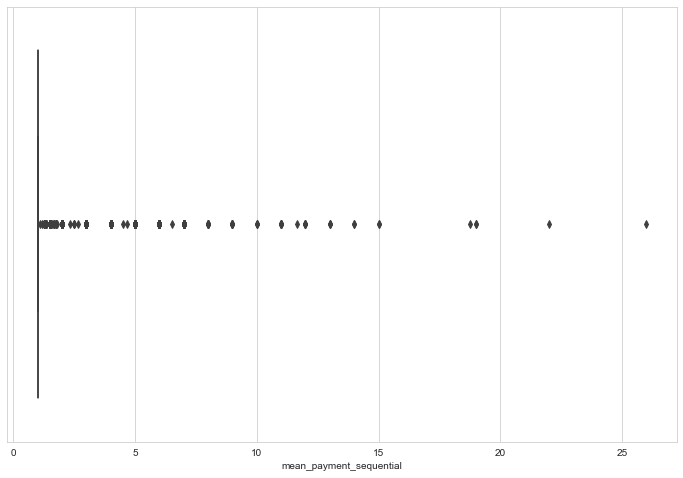

In [129]:
sns.boxplot(data_final["mean_payment_sequential"])

<AxesSubplot:xlabel='mean_payment_installments'>

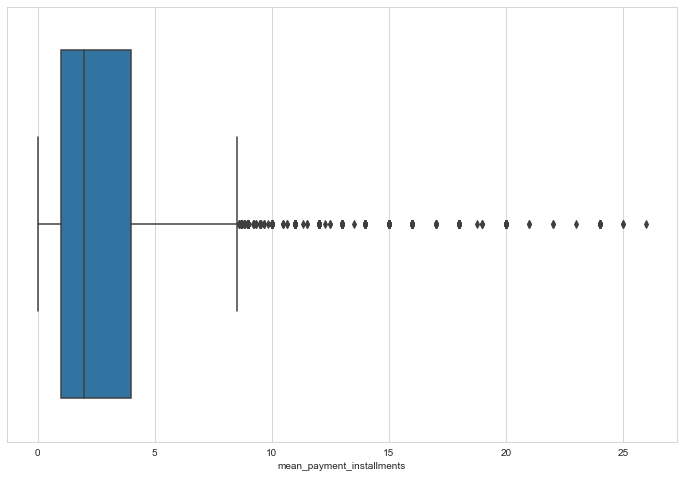

In [130]:
sns.boxplot(data_final["mean_payment_installments"])

<AxesSubplot:xlabel='mean_review_score'>

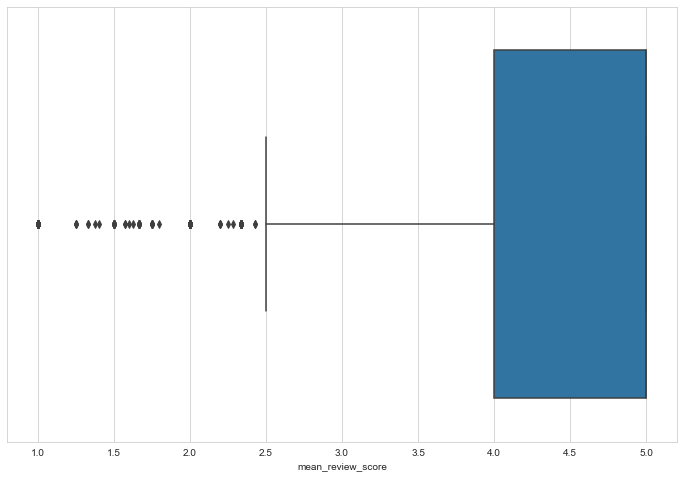

In [131]:
sns.boxplot(data_final["mean_review_score"])

<AxesSubplot:xlabel='mean_delivery_days'>

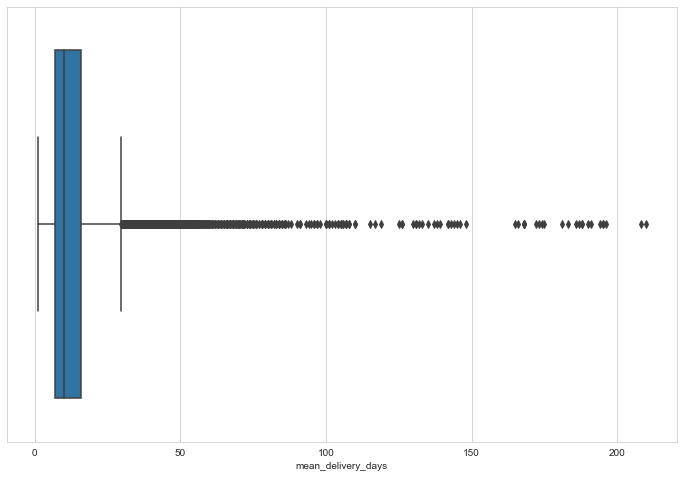

In [132]:
sns.boxplot(data_final["mean_delivery_days"])

Il y'a la présence de valeurs abérantes, donc je fais l'imputation par la médiane. 

In [133]:
# Imputation par la médiane
med_mean_payment_sequential = data_final["mean_payment_sequential"].median()
data_final["mean_payment_sequential"].fillna(med_mean_payment_sequential, inplace=True)

med_mean_payment_installments = data_final["mean_payment_installments"].median()
data_final["mean_payment_installments"].fillna(med_mean_payment_installments, inplace=True)

med_mean_review_score = data_final["mean_review_score"].median()
data_final["mean_review_score"].fillna(med_mean_review_score, inplace=True)

med_mean_delivery_days = data_final["mean_delivery_days"].median()
data_final["mean_delivery_days"].fillna(med_mean_delivery_days, inplace=True)

In [134]:
# Statistique descriptive
data_final.describe().T

,count,mean,std,min,25%,50%,75%,max
nb_orders,93358.0,1.033420,0.209097,1.00,1.00,1.00,1.00,15.00
total_spend,93358.0,165.168210,226.292101,9.59,63.01,107.78,182.51,13664.08
mean_payment_sequential,93358.0,1.043872,0.364435,1.00,1.00,1.00,1.00,26.00
mean_payment_installments,93358.0,2.965962,2.717713,0.00,1.00,2.00,4.00,26.00
mean_review_score,93358.0,4.158806,1.278290,1.00,4.00,5.00,5.00,5.00
mean_delivery_days,93358.0,12.524584,9.550470,1.00,7.00,10.00,16.00,210.00
favorite_sale_month,93358.0,6.035712,3.227586,1.00,3.00,6.00,8.00,12.00
books_cds_media,93358.0,0.009085,0.094527,0.00,0.00,0.00,0.00,1.00
fashion_clothing_accessories,93358.0,0.034082,0.180035,0.00,0.00,0.00,0.00,1.00
flowers_gifts,93358.0,0.094412,0.290952,0.00,0.00,0.00,0.00,1.00


On voit dans la description des variables une valeur qui correspond à 13440 dollars pour le prix d'une commande , c'est ce que nous allons vérifier pour savoir le catégory de produit qu'il s'agit pour faire cette commande.

In [135]:
# Vérification
data_final[data_final["mean_price_order"] == data_final["mean_price_order"].max()]

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,delay_mean_orders,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
3724,0a0a92112bd4c708ca5fde585afaa872,1,13664.08,1.0,1.0,1.0,18.0,9,0.0,0.0,...,1.0,0.0,8.0,8.0,334.0,0.02,13440.0,20080,rio de janeiro,RJ


Il s'agit d'un article technologique avec 8 articles , ce qui est normal pour les outils avec la nouvelle technologie , donc on peut la conserver pour la suite. 

Visualisons la dispersion des montants moyen de commandes en fonction du nombre d'articles pour tenter de répérer d'autres anomalies

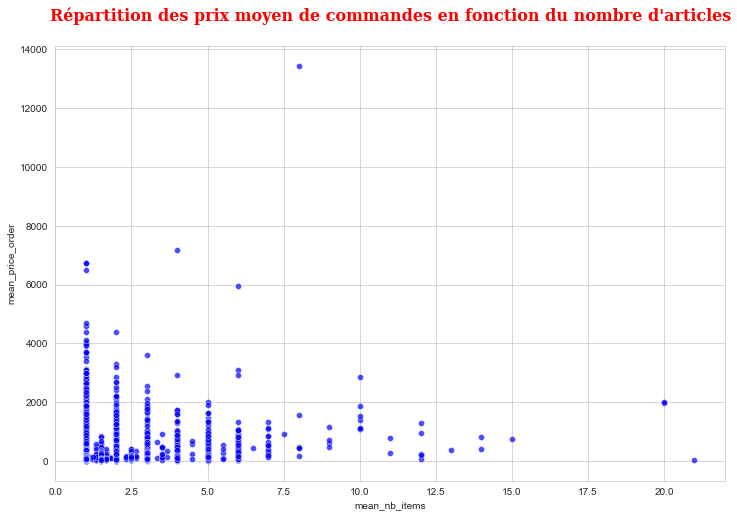

In [136]:
# Visualisation
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_final, y="mean_price_order", x="mean_nb_items",
                color="blue", alpha=0.7)
plt.title(f"Répartition des prix moyen de commandes en fonction du nombre d'articles\n",
          fontdict=font_title, fontsize=16)
plt.show()

Une commande de plus de 20 articles est affichée pour une somme de prêt de 0 

In [137]:
# Vérification
data_final[data_final["mean_nb_items"] > 20]

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,delay_mean_orders,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
25309,4546caea018ad8c692964e3382debd19,1,196.17,1.0,2.0,1.0,15.0,7,0.0,0.0,...,0.0,0.0,21.0,21.0,409.0,0.84,31.8,5882,sao paulo,SP


### Intéressons nous aux différents états des clients

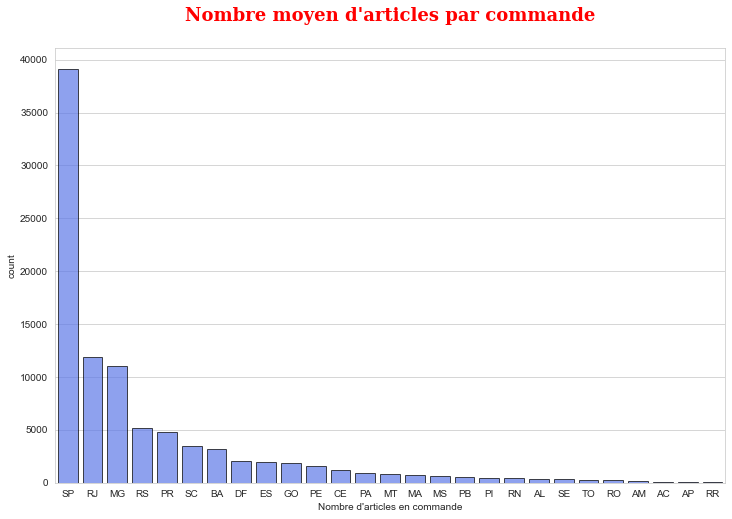

In [138]:
# Visualisation
fig = plt.figure(figsize = (12, 8))
sns.countplot(data = data_final,
             x = "customer_state",
             order = data_final["customer_state"].value_counts(ascending= False).index,
             edgecolor = "black",
             color = "#476bff", alpha = 0.7)
plt.xlabel("Nombre d'articles en commande")
plt.title(f"Nombre moyen d'articles par commande\n",
          fontdict = font_title)
plt.show()

Avec ces codes, on ne peut pas savoir savoir exacte le nom de l'état, nous allons nous reférer d'une source externe qui est Wikipédia pour modifier les codes états par leur noms

In [139]:
url = "https://en.wikipedia.org/wiki/Federative_units_of_Brazil"
states_table = pd.read_html(url)[1].set_index("Code")
states_table.head(3)

,Flag and name,Capital,Largest city,Area(km2)[1],Population(2019)[2],"Density (perkm2, 2019)","GDP (R$millions, 2016)[3]",HDI(2017)[4]
Code,,,,,,,,
AC,Acre,Rio Branco,Rio Branco,167000,879000,6.34,15000,0.719
AL,Alagoas,Maceió,Maceió,27843,3334000,125.52,50000,0.683
AP,Amapá,Macapá,Macapá,142471,838000,2.63,12000,0.740


In [140]:
data_final.head()

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,delay_mean_orders,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,111.0,0.08,129.90,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,114.0,0.30,18.90,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,0.0,0.0,...,0.0,0.0,1.0,1.0,537.0,0.20,69.00,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,10,0.0,0.0,...,1.0,0.0,1.0,1.0,321.0,0.40,25.99,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,13.0,11,0.0,0.0,...,1.0,0.0,1.0,1.0,288.0,0.09,180.00,18040,sorocaba,SP


In [141]:
data_final = pd.merge(data_final.reset_index(), states_table[["Flag and name"]],
                how="left",
                left_on="customer_state",
                right_on="Code")
data_final.drop("customer_state", axis=1, inplace=True)
data_final = data_final.rename(columns={"Flag and name": "customer_state"})

In [142]:
data_final.head()

,index,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,...,technology,toys_baby,total_items,mean_nb_items,delay_mean_orders,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
0,0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,0.0,...,0.0,0.0,1.0,1.0,111.0,0.08,129.90,7787,cajamar,São Paulo
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,0.0,...,0.0,0.0,1.0,1.0,114.0,0.30,18.90,6053,osasco,São Paulo
2,2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,0.0,...,0.0,0.0,1.0,1.0,537.0,0.20,69.00,88115,sao jose,Santa Catarina
3,3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,10,0.0,...,1.0,0.0,1.0,1.0,321.0,0.40,25.99,66812,belem,Pará
4,4,0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,13.0,11,0.0,...,1.0,0.0,1.0,1.0,288.0,0.09,180.00,18040,sorocaba,São Paulo


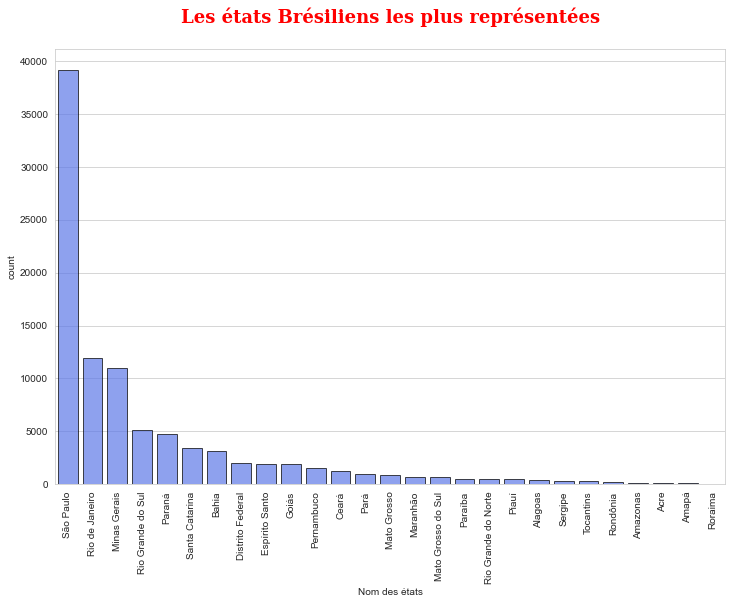

In [143]:
# Visualisation
fig = plt.figure(figsize=(12, 8))
sns.countplot(data = data_final,
             x = "customer_state",
             order = data_final["customer_state"].value_counts(ascending= False).index,
             edgecolor = "black",
             color = "#476bff", alpha=0.7)
plt.xticks(rotation = 90)
plt.xlabel("Nom des états")
plt.title(f"Les états Brésiliens les plus représentées\n",
          fontdict = font_title)
plt.show()

In [144]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93358 entries, 0 to 93357
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         93358 non-null  int64  
 1   customer_unique_id            93358 non-null  object 
 2   nb_orders                     93358 non-null  int64  
 3   total_spend                   93358 non-null  float64
 4   mean_payment_sequential       93358 non-null  float64
 5   mean_payment_installments     93358 non-null  float64
 6   mean_review_score             93358 non-null  float64
 7   mean_delivery_days            93358 non-null  float64
 8   favorite_sale_month           93358 non-null  int64  
 9   books_cds_media               93358 non-null  float64
 10  fashion_clothing_accessories  93358 non-null  float64
 11  flowers_gifts                 93358 non-null  float64
 12  groceries_food_drink          93358 non-null  float64
 13  h

Vérifions si les dépenses sont liés à l'état du client

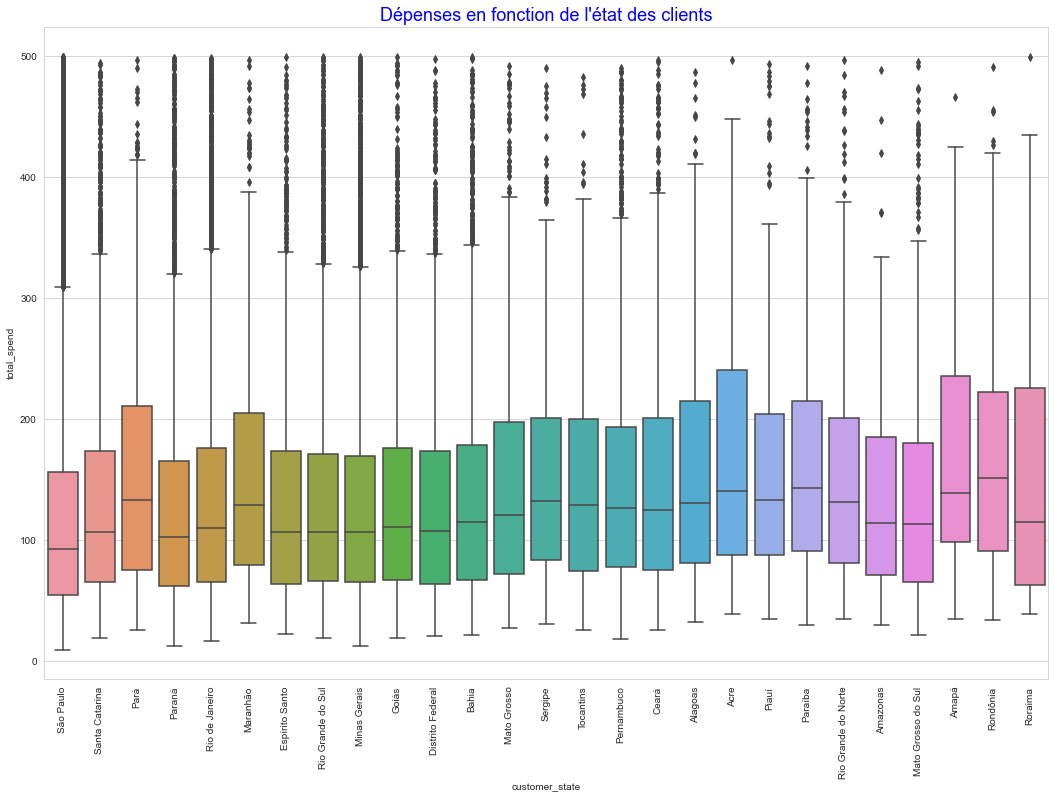

In [145]:
# Visualisations des boxplots
fig = plt.figure(figsize=(18,12))
sns.boxplot(x="customer_state", y="total_spend", 
            data = data_final[data_final["total_spend"] < 500])
plt.xticks(rotation=90)
plt.title("Dépenses en fonction de l'état des clients", fontsize=18, color="b")
plt.show()

On voit l'état du client à un impact sur les dépenses du client.

Afin d'utiliser une variable de localisation encodable sans impact négatif sur nos modélisation, nous allons calculer la distance Haversine entre l'état du client (moyenne des latitudes et longitudes de l'état) et le siège de Olist :

In [146]:
# Vérification"
data_geoloca[data_geoloca["geolocation_lat"] == data_geoloca["geolocation_lat"].min()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
992584,98780,-36.605374,-64.283946,santa rosa,RS


In [147]:
# Vérification"
data_geoloca[data_geoloca["geolocation_lng"] == data_geoloca["geolocation_lng"].max()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
965687,95130,14.585073,121.105394,santa lucia do piai,RS


In [148]:
state_location = data_geoloca.groupby("geolocation_state").mean()
state_location = pd.merge(states_table[["Flag and name"]].reset_index(), 
                          state_location, 
                          right_on="geolocation_state", 
                          left_on="Code", 
                          how="left")
state_location = state_location[["Flag and name", "geolocation_lat", "geolocation_lng"]]

# Olist location
olist_lat = -25.43045
olist_lon = -49.29207

In [149]:
def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [150]:
# Haversine distance between centre state and Olist office
state_location['harvesine_distance'] = [haversine_distance(olist_lat, olist_lon, x, y) 
                              for x, y in zip(state_location.geolocation_lat, 
                                              state_location.geolocation_lng)]

In [151]:
data_final = pd.merge(data_final, state_location[["Flag and name", "harvesine_distance"]],
         how="left",
         left_on="customer_state",
         right_on="Flag and name")
data_final.drop("index", axis=1, inplace=True)
data_final.set_index("customer_unique_id", inplace=True)
data_final.head(3)

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,flowers_gifts,...,total_items,mean_nb_items,delay_mean_orders,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state,Flag and name,harvesine_distance
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,0.0,0.0,0.0,...,1.0,1.0,111.0,0.08,129.9,7787,cajamar,São Paulo,São Paulo,209.713834
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,0.0,0.0,0.0,...,1.0,1.0,114.0,0.30,18.9,6053,osasco,São Paulo,São Paulo,209.713834
0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,0.0,0.0,0.0,...,1.0,1.0,537.0,0.20,69.0,88115,sao jose,Santa Catarina,Santa Catarina,125.363853


# Analyse bivariée : Marice de corrélation

Nous allons visualiser s'il existe des corrélations linéaires entre les différentes données

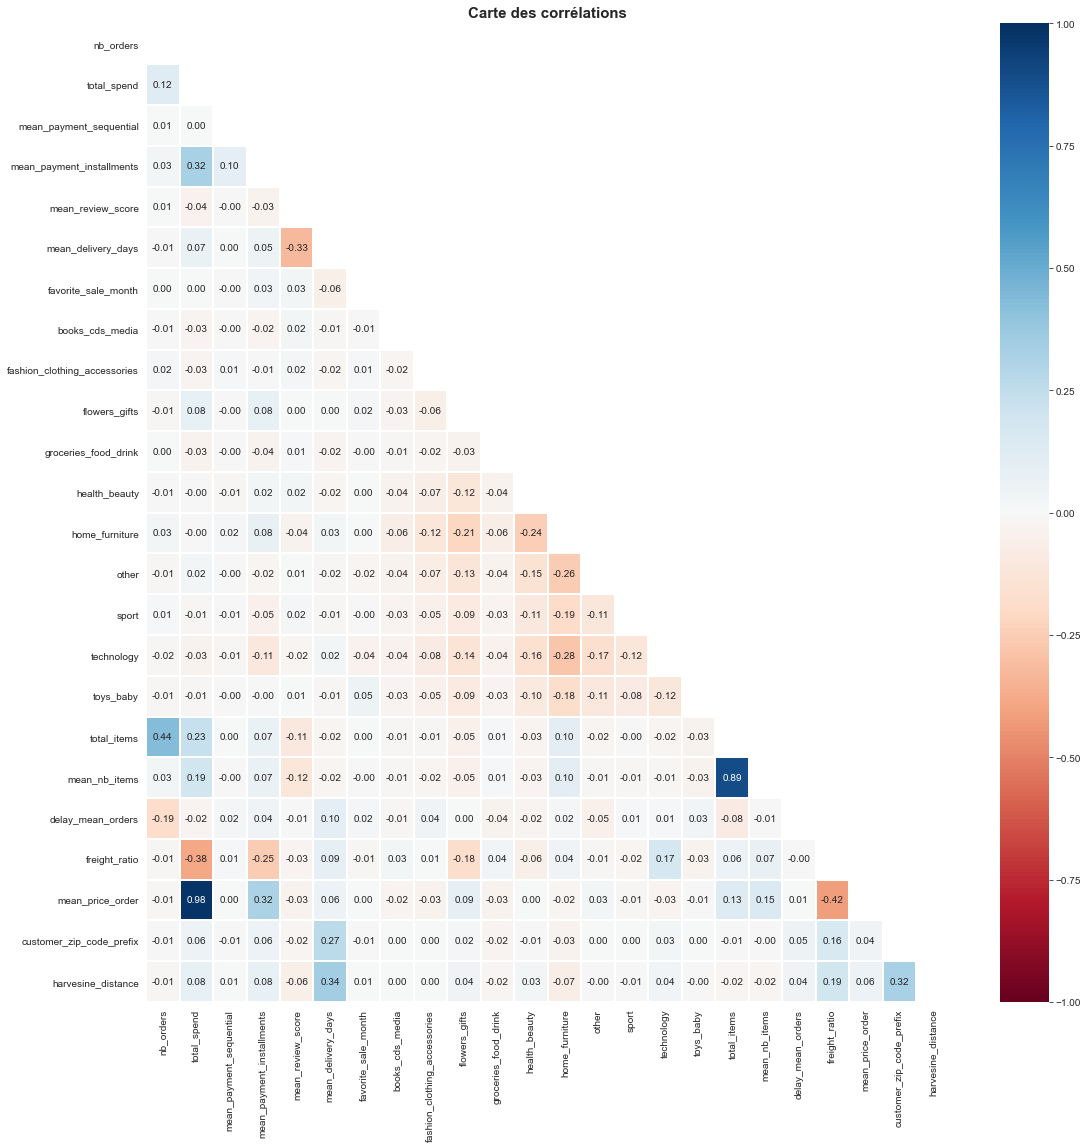

In [152]:
def plot_heatmap(data):
    cor_map = data.corr()
    plt.figure(figsize = (18, 18))
    mask = np.triu(np.ones_like(cor_map, dtype=bool))
    sns.heatmap(cor_map, mask=mask, center=0, cmap='RdBu', 
                linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
    plt.title('Carte des corrélations', fontsize=15, fontweight="bold")
    plt.show()

plot_heatmap(data_final)

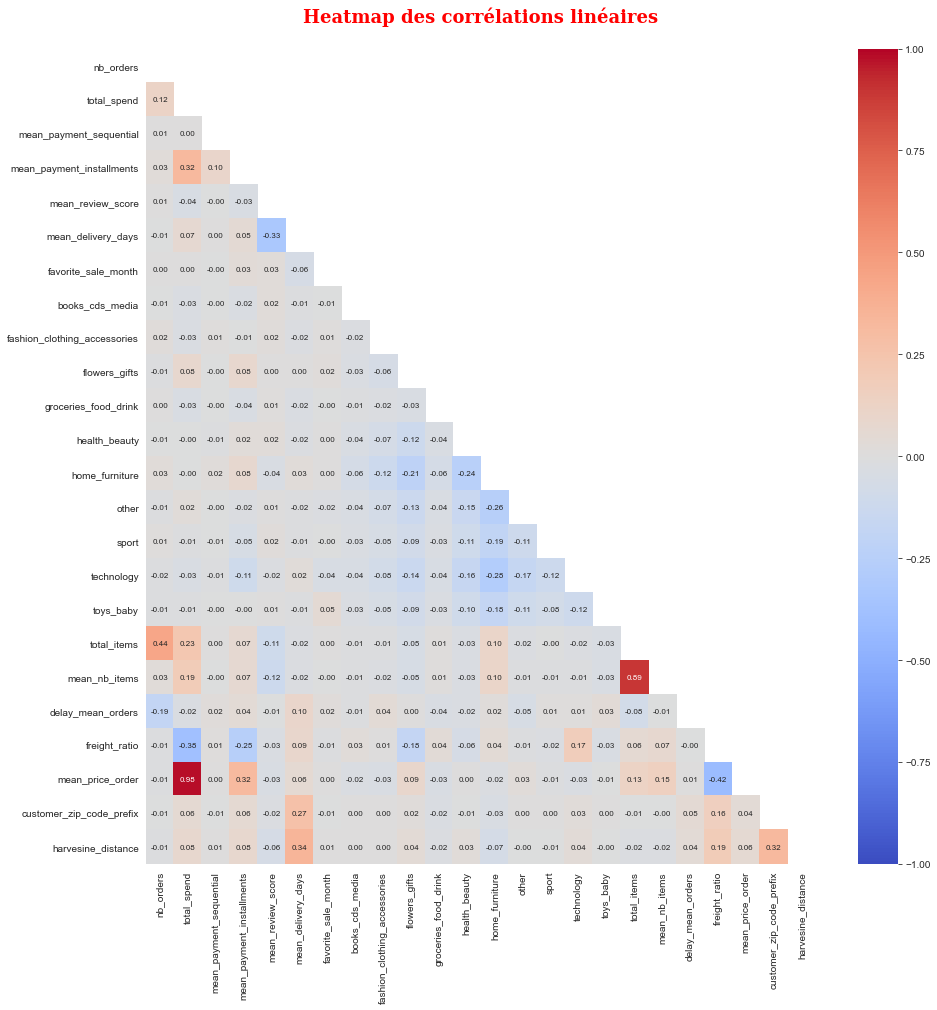

In [153]:
corr = data_final.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

On remarque que le prix total est très fortement corrélé au prix moyen par commande (idem pour le nombre d'articles moyen et le nombre d'articles total). Cela est dû au fait que la majorité des clients n'ont commandé qu'une seule fois.

Nous allons supprimer ces avariables pour éviter la muticolinéarité.

In [154]:
# Suppression des variables fortement corrélées
data_final = data_final.drop(columns = ["mean_price_order","mean_nb_items"])

Enfin, nous allons sauvegarder le datast pour passer à la segmention de clients pour une classification non supervisée.

In [155]:
# Sauvegarder le dataset final
data_final.to_csv("customers_segmentation.csv")